In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Introdução do projeto

> Uma certa empresa de varejo, com grande volume de vendas realizadas pela internet conduziu um <u>estudo de precificação</u> para <u>aumentar seu faturamento</u>. Como resultado desse estudo, foram elaboradas **diversas políticas de desconto**.
>
> Entretanto, a empresa sabe que há clientes que **não se importam com o preço** e comparão **de qualquer jeito**.
>
> Como selecionar os clientes sensíveis ao desconto para fazer uma **oferta assertiva**?

In [4]:
#!pip install pyarrow

#### Extraindo a base de dados

a base de dados está disponivel em: https://drive.google.com/file/d/1fHb9iz8ugEovQ7hFRhBpwQ3ztHnIuBuT/view?usp=sharing

In [5]:
df = pd.read_parquet('base_ecommerce.parquet',)
display(df)

,event_type,product_id,brand,price,user_id,user_session,target,cat_0,cat_1,cat_2,cat_3,timestamp,ts_hour,ts_minute,ts_weekday,ts_day,ts_month,ts_year
0,cart,1005014,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,0,electronics,smartphone,NA,NA,2019-11-01 00:00:14,0,0,4,1,11,2019
1,cart,1005115,apple,949.47,565865924,fd4bd6d4-bd14-4fdc-9aff-bd41a594f82e,0,electronics,smartphone,NA,NA,2019-11-01 00:03:39,0,3,4,1,11,2019
2,cart,1002542,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,0,electronics,smartphone,NA,NA,2019-11-01 00:05:54,0,5,4,1,11,2019
3,cart,1002542,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,0,electronics,smartphone,NA,NA,2019-11-01 00:07:22,0,7,4,1,11,2019
4,cart,4804056,apple,160.57,522355747,0a1f37d1-71b7-4645-a8a7-ab91bc198a51,0,electronics,audio,headphone,NA,2019-11-01 00:10:45,0,10,4,1,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495237,purchase,100013136,NA,305.03,514703063,c28543ae-3cd1-4fda-ac2e-8a6c6d16ae65,1,auto,accessories,compressor,NA,2020-01-31 23:58:08,23,58,4,31,1,2020
11495238,purchase,1004210,samsung,79.54,571761801,9c495f7f-e0a7-49be-8ac0-1a6383234875,1,construction,tools,light,NA,2020-01-31 23:58:35,23,58,4,31,1,2020
11495239,purchase,5100562,apple,294.34,518849571,13e7a25f-90cb-45e9-baf0-a94e1f90628e,1,electronics,clocks,NA,NA,2020-01-31 23:58:39,23,58,4,31,1,2020
11495240,purchase,1005186,samsung,720.46,599883250,8f221a6b-20c4-43c1-a1c6-cb1b1f189efe,1,appliances,kitchen,refrigerators,NA,2020-01-31 23:59:39,23,59,4,31,1,2020


In [6]:
display(df.dtypes)

event_type              object
product_id              object
brand                   object
price                  float64
user_id                 object
user_session            object
target                   int64
cat_0                   object
cat_1                   object
cat_2                   object
cat_3                   object
timestamp       datetime64[ns]
ts_hour                  int64
ts_minute                int64
ts_weekday               int64
ts_day                   int64
ts_month                 int64
ts_year                  int64
dtype: object

### Ententendo os dados

In [7]:
print(df.cat_0.value_counts()) #conta as categorias dos produtos

construction    3375478
electronics     2577712
appliances      1531851
NA              1527738
apparel          848312
sport            565069
computers        373886
furniture        336493
kids             164476
auto              96122
accessories       72725
country_yard      15993
medicine           5011
stationery         4376
Name: cat_0, dtype: int64


In [8]:
print(df.cat_0.value_counts(normalize=True))#em valor %

construction    0.293641
electronics     0.224242
appliances      0.133260
NA              0.132902
apparel         0.073797
sport           0.049157
computers       0.032525
furniture       0.029272
kids            0.014308
auto            0.008362
accessories     0.006327
country_yard    0.001391
medicine        0.000436
stationery      0.000381
Name: cat_0, dtype: float64


In [9]:
print(df.cat_1.value_counts())

tools         3319883
smartphone    1530042
NA            1527738
kitchen        965172
shoes          584667
               ...   
dress            1253
skirt             691
jacket            625
belt              414
diving            356
Name: cat_1, Length: 61, dtype: int64


In [10]:
print(df.loc[df.cat_0=='electronics'].cat_1.value_counts())

smartphone    1530042
audio          387516
clocks         334168
video          176316
camera          74995
tablet          47992
telephone       26683
Name: cat_1, dtype: int64


In [11]:
print(df.loc[df.cat_1=='smartphone'].cat_0.value_counts(dropna=False))

electronics    1530042
Name: cat_0, dtype: int64


In [12]:
print(df.loc[ df.cat_1=='smartphone' ].brand.value_counts())

samsung     616393
apple       497350
xiaomi      231352
huawei       93263
oppo         56084
             ...  
toto             1
kisswill         1
leeco            1
remax            1
fini             1
Name: brand, Length: 63, dtype: int64


#### Essa base é uma base visão produto no carrinho: para cada produto que um usuário inseriu no carrinho de compras, temos uma linha.""A coluna target indica se o cliente de fato fez a compra ou se ele, porventura, abandonou o carrinho"", por causa desse detalhe é possivel que o mesmo cliente apareça varias vezes

In [13]:
display(df.user_id.value_counts())

568782581    2134
549109608    1355
513230794    1135
538473314    1119
553431815    1050
             ... 
604929329       1
412758766       1
551683090       1
583437697       1
514559345       1
Name: user_id, Length: 2547058, dtype: int64

In [14]:
print(df.timestamp.min(),df.timestamp.max())

2019-10-01 00:05:14 2020-02-29 23:59:50


In [15]:
display(df.loc[df.user_id=='553431815'])

,event_type,product_id,brand,price,user_id,user_session,target,cat_0,cat_1,cat_2,cat_3,timestamp,ts_hour,ts_minute,ts_weekday,ts_day,ts_month,ts_year
63895,purchase,1005107,apple,1002.57,553431815,345e813b-ddfb-443a-8021-496efc4d0cf7,1,electronics,smartphone,NA,NA,2019-11-04 10:51:32,10,51,0,4,11,2019
63902,purchase,1005107,apple,1002.57,553431815,345e813b-ddfb-443a-8021-496efc4d0cf7,1,electronics,smartphone,NA,NA,2019-11-04 10:52:22,10,52,0,4,11,2019
63908,purchase,1005107,apple,1002.57,553431815,345e813b-ddfb-443a-8021-496efc4d0cf7,1,electronics,smartphone,NA,NA,2019-11-04 10:53:12,10,53,0,4,11,2019
63913,purchase,1005107,apple,1002.57,553431815,345e813b-ddfb-443a-8021-496efc4d0cf7,1,electronics,smartphone,NA,NA,2019-11-04 10:54:08,10,54,0,4,11,2019
66274,purchase,1005107,apple,999.65,553431815,fd974264-8190-437e-9f90-e7b4c0a2e44a,1,electronics,smartphone,NA,NA,2019-11-04 15:28:30,15,28,0,4,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11281744,cart,4804056,apple,150.75,553431815,54affad3-c0fe-4d6a-8b7b-ac8626fd9682,0,sport,bicycle,NA,NA,2020-01-30 18:39:36,18,39,3,30,1,2020
11281745,cart,4804056,apple,150.75,553431815,f67faa7b-6b1d-4097-a006-ca8d153d1812,0,sport,bicycle,NA,NA,2020-01-30 18:39:36,18,39,3,30,1,2020
11281746,cart,4804056,apple,150.75,553431815,bc77b873-0241-4f09-9e5b-4c54f9d342bf,0,sport,bicycle,NA,NA,2020-01-30 18:39:36,18,39,3,30,1,2020
11281747,cart,4804056,apple,150.75,553431815,33af4252-64bb-444f-ad40-14be8baecbfd,0,sport,bicycle,NA,NA,2020-01-30 18:39:36,18,39,3,30,1,2020


In [16]:
print(df.groupby(['user_id','product_id']).target.sum())

user_id    product_id
100037567  6400339       0
100140882  4200544       0
101875240  100019252     1
           1005161       0
107620212  12714210      0
                        ..
98232836   1701446       0
           2702256       0
           2702522       0
           4400404       0
           4400468       0
Name: target, Length: 6298527, dtype: int64


In [17]:
print(df.groupby(['user_id','product_id']).target.sum().sort_values())

user_id    product_id
100037567  6400339         0
556399296  12707051        0
           3601278         0
           3601485         0
556399430  3200353         0
                        ... 
545376441  1002544       242
569374504  1005116       264
564068124  1004833       285
553431815  1005107       441
563599039  1005174       474
Name: target, Length: 6298527, dtype: int64


In [18]:
display(df.loc[(df.user_id=='563599039') & (df.product_id=='1005174')])

,event_type,product_id,brand,price,user_id,user_session,target,cat_0,cat_1,cat_2,cat_3,timestamp,ts_hour,ts_minute,ts_weekday,ts_day,ts_month,ts_year
3587903,purchase,1005174,samsung,643.23,563599039,4950cfac-7998-4aed-8aa0-00dc38ba5bdf,1,appliances,kitchen,refrigerators,NA,2020-02-01 08:27:31,8,27,5,1,2,2020
3592543,purchase,1005174,samsung,643.23,563599039,801b5960-65b7-486c-9e49-bdf844813573,1,appliances,kitchen,refrigerators,NA,2020-02-01 10:28:13,10,28,5,1,2,2020
3592611,purchase,1005174,samsung,643.23,563599039,801b5960-65b7-486c-9e49-bdf844813573,1,appliances,kitchen,refrigerators,NA,2020-02-01 10:29:53,10,29,5,1,2,2020
3592694,purchase,1005174,samsung,643.23,563599039,801b5960-65b7-486c-9e49-bdf844813573,1,appliances,kitchen,refrigerators,NA,2020-02-01 10:31:32,10,31,5,1,2,2020
3592750,purchase,1005174,samsung,643.23,563599039,801b5960-65b7-486c-9e49-bdf844813573,1,appliances,kitchen,refrigerators,NA,2020-02-01 10:33:08,10,33,5,1,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11493700,purchase,1005174,samsung,643.23,563599039,411fb53a-75a7-4f16-bdfe-606d6afba220,1,appliances,kitchen,refrigerators,NA,2020-01-31 19:55:37,19,55,4,31,1,2020
11493717,purchase,1005174,samsung,643.23,563599039,411fb53a-75a7-4f16-bdfe-606d6afba220,1,appliances,kitchen,refrigerators,NA,2020-01-31 19:56:45,19,56,4,31,1,2020
11493738,purchase,1005174,samsung,643.23,563599039,411fb53a-75a7-4f16-bdfe-606d6afba220,1,appliances,kitchen,refrigerators,NA,2020-01-31 19:58:06,19,58,4,31,1,2020
11493752,purchase,1005174,samsung,643.23,563599039,411fb53a-75a7-4f16-bdfe-606d6afba220,1,appliances,kitchen,refrigerators,NA,2020-01-31 19:59:10,19,59,4,31,1,2020


In [19]:
display(df.loc[(df.user_id=='545376441') & (df.product_id=='1002544')].groupby([
    'ts_day','ts_month','ts_year'
]).target.sum())

ts_day  ts_month  ts_year
1       12        2019        1
2       1         2020        0
        2         2020        1
        12        2019        1
3       1         2020        7
        12        2019        1
4       1         2020        5
5       1         2020        1
6       1         2020        2
7       1         2020        3
        11        2019        1
8       1         2020        1
        11        2019        3
        12        2019        2
9       1         2020        2
        11        2019        3
        12        2019        4
10      1         2020        2
        11        2019        4
11      1         2020        3
        12        2019        7
12      1         2020        9
        11        2019        1
13      1         2020        1
        11        2019        2
        12        2019        2
14      1         2020        2
        11        2019        1
        12        2019        2
15      11        2019        0
        12    

#### Um mesmo product_id pode estar em categorias diferentes!

Para avaliar corretamente, é preciso garantir que estou olhando sempre para o mesmo produto!

In [20]:
display(df.groupby(['user_id','product_id','cat_0','cat_1','cat_2','cat_3']).target.sum().sort_values())

user_id    product_id  cat_0         cat_1        cat_2          cat_3
100037567  6400339     apparel       shoes        step_ins       NA         0
555711415  1307350     computers     notebook     NA             NA         0
555711484  3900002     appliances    environment  water_heater   NA         0
555711545  1005124     construction  tools        light          NA         0
           17301022    apparel       shoes        sandals        NA         0
                                                                         ... 
523974502  5100563     electronics   clocks       NA             NA       231
569374504  1005116     construction  tools        light          NA       264
564068124  1004833     electronics   smartphone   NA             NA       268
553431815  1005107     construction  tools        light          NA       402
563599039  1005174     appliances    kitchen      refrigerators  NA       474
Name: target, Length: 6446786, dtype: int64

In [21]:
print(df.loc[
    (df.user_id=='563599039') & 
    (df.product_id=='1005174') & 
    (df.cat_0=='appliances') & 
    (df.cat_1=='kitchen') & 
    (df.cat_2=='refrigerators') & 
    (df.cat_3=='NA')
].groupby([
    'ts_day','ts_month','ts_year'
]).target.sum())

ts_day  ts_month  ts_year
1       1         2020        0
        2         2020       24
2       1         2020        0
        2         2020       31
        12        2019        2
3       1         2020        1
        2         2020       10
        12        2019        1
4       1         2020        1
        2         2020       28
        12        2019        3
5       2         2020       19
        12        2019        3
6       1         2020        4
        2         2020        4
7       1         2020        1
        2         2020       16
8       1         2020        1
        2         2020       29
9       1         2020        7
        2         2020        1
10      1         2020        3
12      1         2020       23
13      1         2020        3
        12        2019        4
14      1         2020       15
15      1         2020        9
17      12        2019        2
18      1         2020       17
        12        2019        3
19      1     

## Temporalidade

Note que nossos dados estão **distribuídos no tempo**.

será visualizado o **faturamento total por dia**

In [22]:
print(df.timestamp)

0          2019-11-01 00:00:14
1          2019-11-01 00:03:39
2          2019-11-01 00:05:54
3          2019-11-01 00:07:22
4          2019-11-01 00:10:45
                   ...        
11495237   2020-01-31 23:58:08
11495238   2020-01-31 23:58:35
11495239   2020-01-31 23:58:39
11495240   2020-01-31 23:59:39
11495241   2020-01-31 23:59:51
Name: timestamp, Length: 11495242, dtype: datetime64[ns]


In [23]:
df.loc[:,'dia'] = df.timestamp.dt.date
df.loc[:,'faturamento'] = df.price*df.target

display(df)

,event_type,product_id,brand,price,user_id,user_session,target,cat_0,cat_1,cat_2,cat_3,timestamp,ts_hour,ts_minute,ts_weekday,ts_day,ts_month,ts_year,dia,faturamento
0,cart,1005014,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,0,electronics,smartphone,NA,NA,2019-11-01 00:00:14,0,0,4,1,11,2019,2019-11-01,0.00
1,cart,1005115,apple,949.47,565865924,fd4bd6d4-bd14-4fdc-9aff-bd41a594f82e,0,electronics,smartphone,NA,NA,2019-11-01 00:03:39,0,3,4,1,11,2019,2019-11-01,0.00
2,cart,1002542,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,0,electronics,smartphone,NA,NA,2019-11-01 00:05:54,0,5,4,1,11,2019,2019-11-01,0.00
3,cart,1002542,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,0,electronics,smartphone,NA,NA,2019-11-01 00:07:22,0,7,4,1,11,2019,2019-11-01,0.00
4,cart,4804056,apple,160.57,522355747,0a1f37d1-71b7-4645-a8a7-ab91bc198a51,0,electronics,audio,headphone,NA,2019-11-01 00:10:45,0,10,4,1,11,2019,2019-11-01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495237,purchase,100013136,NA,305.03,514703063,c28543ae-3cd1-4fda-ac2e-8a6c6d16ae65,1,auto,accessories,compressor,NA,2020-01-31 23:58:08,23,58,4,31,1,2020,2020-01-31,305.03
11495238,purchase,1004210,samsung,79.54,571761801,9c495f7f-e0a7-49be-8ac0-1a6383234875,1,construction,tools,light,NA,2020-01-31 23:58:35,23,58,4,31,1,2020,2020-01-31,79.54
11495239,purchase,5100562,apple,294.34,518849571,13e7a25f-90cb-45e9-baf0-a94e1f90628e,1,electronics,clocks,NA,NA,2020-01-31 23:58:39,23,58,4,31,1,2020,2020-01-31,294.34
11495240,purchase,1005186,samsung,720.46,599883250,8f221a6b-20c4-43c1-a1c6-cb1b1f189efe,1,appliances,kitchen,refrigerators,NA,2020-01-31 23:59:39,23,59,4,31,1,2020,2020-01-31,720.46


<AxesSubplot:xlabel='dia'>

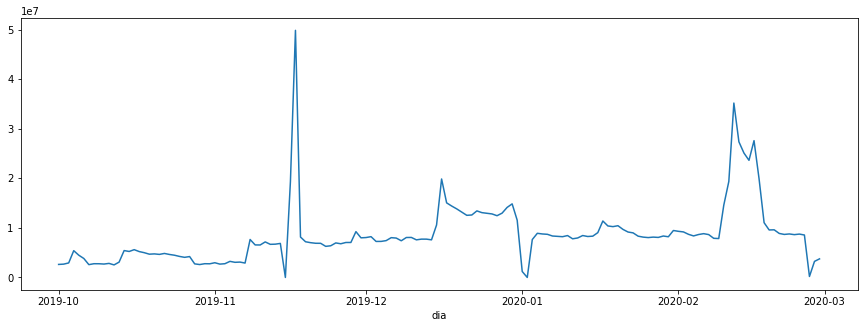

In [24]:
plt.figure(figsize=(15,5))
df.groupby('dia').faturamento.sum().plot()

existe um pico entres as datas 11/2019 e 12/2019

In [25]:
print(df.groupby('dia').faturamento.sum().loc[lambda x: x>4e7])

dia
2019-11-17    4.984020e+07
Name: faturamento, dtype: float64


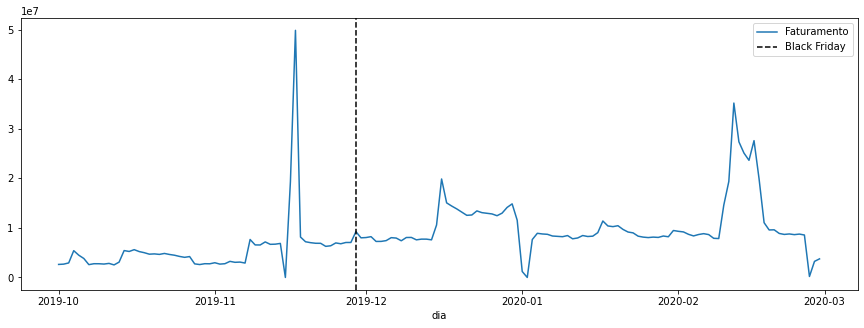

In [26]:
plt.figure(figsize=(15,5))
df.groupby('dia').faturamento.sum().plot(label='Faturamento')
plt.axvline(pd.to_datetime('2019-11-29'),color='k', linestyle='--', label='Black Friday')

plt.legend()

In [27]:
print(df.loc[(df.dia==pd.to_datetime('2019-11-16')) & (df.target==1)].product_id.value_counts())

4804056     1512
1005115     1441
1004856     1421
1004767     1161
1002544      678
            ... 
22000159       1
5100530        1
12701089       1
4501712        1
5400768        1
Name: product_id, Length: 11458, dtype: int64


In [28]:
df.loc[(df.dia==pd.to_datetime('2019-11-17')) & (df.target==1)].product_id.value_counts()

4804056      3747
1004856      3609
1005115      3147
1004767      2310
1002544      1550
             ... 
26016416        1
3701562         1
2700964         1
27100013        1
100001974       1
Name: product_id, Length: 22741, dtype: int64

In [29]:
df.loc[(df.dia==pd.to_datetime('2019-11-18')) & (df.target==1)].product_id.value_counts()

1004856     1315
1004767      780
1005115      747
4804056      725
1004833      439
            ... 
4700632        1
21404598       1
2501751        1
27701172       1
12709719       1
Name: product_id, Length: 6680, dtype: int64

In [30]:
df.loc[(df.dia==pd.to_datetime('2019-11-17')) & (df.target==1) & (df.product_id=='4804056')]

,event_type,product_id,brand,price,user_id,user_session,target,cat_0,cat_1,cat_2,cat_3,timestamp,ts_hour,ts_minute,ts_weekday,ts_day,ts_month,ts_year,dia,faturamento
1562773,purchase,4804056,apple,169.35,571571476,de4e6abc-9c35-497a-abe6-7a97926d19cc,1,electronics,audio,headphone,NA,2019-11-17 03:43:39,3,43,6,17,11,2019,2019-11-17,169.35
1562960,purchase,4804056,apple,169.35,514447590,3dc5a3f1-47a8-4ee7-8551-8ffa5a87c8a4,1,electronics,audio,headphone,NA,2019-11-17 03:45:33,3,45,6,17,11,2019,2019-11-17,169.35
1562976,purchase,4804056,apple,169.35,512496399,b72b15c1-0ba0-428d-a5e7-850354663b8b,1,electronics,audio,headphone,NA,2019-11-17 03:45:40,3,45,6,17,11,2019,2019-11-17,169.35
1563017,purchase,4804056,apple,169.35,512853210,33f4d1bc-c921-4afb-9b5f-24b29bf40705,1,electronics,audio,headphone,NA,2019-11-17 03:46:04,3,46,6,17,11,2019,2019-11-17,169.35
1563085,purchase,4804056,apple,169.35,515967644,eabbc426-f7c0-4945-8af7-91465407f25e,1,electronics,audio,headphone,NA,2019-11-17 03:46:41,3,46,6,17,11,2019,2019-11-17,169.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896503,purchase,4804056,apple,167.31,553885763,4f008af6-6221-4868-b265-bffc672bdd97,1,electronics,audio,headphone,NA,2019-11-17 22:53:12,22,53,6,17,11,2019,2019-11-17,167.31
1896531,purchase,4804056,apple,167.31,515116505,735e25a9-d1ec-492e-877e-91f8c4b1b2da,1,electronics,audio,headphone,NA,2019-11-17 23:01:42,23,1,6,17,11,2019,2019-11-17,167.31
1896535,purchase,4804056,apple,167.31,563056774,1b709748-409b-425e-9e83-0f6cce522e68,1,electronics,audio,headphone,NA,2019-11-17 23:02:58,23,2,6,17,11,2019,2019-11-17,167.31
1896609,purchase,4804056,apple,167.31,512389601,28b166ef-a6db-4bee-becd-8ba9b89b48e7,1,electronics,audio,headphone,NA,2019-11-17 23:32:01,23,32,6,17,11,2019,2019-11-17,167.31


In [31]:
df.loc[(df.dia==pd.to_datetime('2019-11-17')) & (df.target==1) & (df.product_id=='1004856')]

,event_type,product_id,brand,price,user_id,user_session,target,cat_0,cat_1,cat_2,cat_3,timestamp,ts_hour,ts_minute,ts_weekday,ts_day,ts_month,ts_year,dia,faturamento
1562756,purchase,1004856,samsung,128.42,572419063,3b203b9f-f416-490f-aeee-e4e5f536e5cc,1,electronics,smartphone,NA,NA,2019-11-17 03:43:27,3,43,6,17,11,2019,2019-11-17,128.42
1562759,purchase,1004856,samsung,128.42,512549741,99bc5278-fb3d-4ed7-ba50-0ffb068db825,1,electronics,smartphone,NA,NA,2019-11-17 03:43:29,3,43,6,17,11,2019,2019-11-17,128.42
1562814,purchase,1004856,samsung,128.42,513275604,3754df19-4d6a-4bd0-8fc8-3cf299b256d8,1,electronics,smartphone,NA,NA,2019-11-17 03:44:03,3,44,6,17,11,2019,2019-11-17,128.42
1562819,purchase,1004856,samsung,128.42,521416685,26860bcd-a939-4314-81af-4b869e86445c,1,electronics,smartphone,NA,NA,2019-11-17 03:44:07,3,44,6,17,11,2019,2019-11-17,128.42
1562837,purchase,1004856,samsung,128.42,568693153,7cdc5b17-9e38-41cd-8683-94923a7630eb,1,electronics,smartphone,NA,NA,2019-11-17 03:44:15,3,44,6,17,11,2019,2019-11-17,128.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896494,purchase,1004856,samsung,125.92,571334639,def2071c-07f2-455d-b23a-50f81f08ef3d,1,electronics,smartphone,NA,NA,2019-11-17 22:48:15,22,48,6,17,11,2019,2019-11-17,125.92
1896537,purchase,1004856,samsung,125.92,513186078,b2bda80e-3be5-4bcc-9df1-929f5edd299f,1,electronics,smartphone,NA,NA,2019-11-17 23:03:13,23,3,6,17,11,2019,2019-11-17,125.92
1896583,purchase,1004856,samsung,125.92,564346981,1ffd4283-8932-420c-95b1-9900814dbc77,1,electronics,smartphone,NA,NA,2019-11-17 23:22:24,23,22,6,17,11,2019,2019-11-17,125.92
1896642,purchase,1004856,samsung,125.92,572394253,0707c3af-e025-483b-b874-a0083f0128eb,1,electronics,smartphone,NA,NA,2019-11-17 23:48:55,23,48,6,17,11,2019,2019-11-17,125.92


In [32]:
df.loc[(df.dia==pd.to_datetime('2019-11-17')) & (df.target==1) & (df.product_id=='1005115')]

,event_type,product_id,brand,price,user_id,user_session,target,cat_0,cat_1,cat_2,cat_3,timestamp,ts_hour,ts_minute,ts_weekday,ts_day,ts_month,ts_year,dia,faturamento
1563068,purchase,1005115,apple,958.32,520468907,ea47cab4-7d79-4c77-9545-20e4920cbb41,1,electronics,smartphone,NA,NA,2019-11-17 03:46:33,3,46,6,17,11,2019,2019-11-17,958.32
1563132,purchase,1005115,apple,958.71,542167737,b2ad833e-ca7a-48cd-9758-041cb9489c25,1,electronics,smartphone,NA,NA,2019-11-17 03:47:06,3,47,6,17,11,2019,2019-11-17,958.71
1563262,purchase,1005115,apple,958.71,512939957,1325389b-076a-419d-a260-1f615a5f54bd,1,electronics,smartphone,NA,NA,2019-11-17 03:48:23,3,48,6,17,11,2019,2019-11-17,958.71
1563336,purchase,1005115,apple,958.71,524646909,4bc090c3-0135-4f6e-aeb8-68a80229eeab,1,electronics,smartphone,NA,NA,2019-11-17 03:49:04,3,49,6,17,11,2019,2019-11-17,958.71
1563411,purchase,1005115,apple,958.32,571916164,01f7a016-035b-408d-863f-7dbaeb91a121,1,electronics,smartphone,NA,NA,2019-11-17 03:49:37,3,49,6,17,11,2019,2019-11-17,958.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896417,purchase,1005115,apple,913.28,512803922,3e262be6-527f-47fb-9402-92c79545509b,1,electronics,smartphone,NA,NA,2019-11-17 22:24:11,22,24,6,17,11,2019,2019-11-17,913.28
1896431,purchase,1005115,apple,913.28,515280896,b2a0233d-af17-412f-bac9-25618d745445,1,electronics,smartphone,NA,NA,2019-11-17 22:29:10,22,29,6,17,11,2019,2019-11-17,913.28
1896436,purchase,1005115,apple,913.28,551726366,a71905ff-7eb2-439f-9cd6-63557739f57e,1,electronics,smartphone,NA,NA,2019-11-17 22:29:44,22,29,6,17,11,2019,2019-11-17,913.28
1896480,purchase,1005115,apple,913.27,514730347,a37ad165-7178-4ae0-964d-eb9abae19d43,1,electronics,smartphone,NA,NA,2019-11-17 22:43:07,22,43,6,17,11,2019,2019-11-17,913.27


In [33]:
df.loc[(df.dia==pd.to_datetime('2019-11-17')) & (df.target==1) & (df.product_id=='1004767')]

,event_type,product_id,brand,price,user_id,user_session,target,cat_0,cat_1,cat_2,cat_3,timestamp,ts_hour,ts_minute,ts_weekday,ts_day,ts_month,ts_year,dia,faturamento
1562741,purchase,1004767,samsung,264.82,542986061,11994ada-b9af-4ae5-94a7-2980290b84c2,1,electronics,smartphone,NA,NA,2019-11-17 03:43:22,3,43,6,17,11,2019,2019-11-17,264.82
1562839,purchase,1004767,samsung,264.82,570548556,c60ddcee-7e6a-47a6-ba3f-6671d3a08c27,1,electronics,smartphone,NA,NA,2019-11-17 03:44:17,3,44,6,17,11,2019,2019-11-17,264.82
1562965,purchase,1004767,samsung,264.82,571794194,bf29c35e-a65e-45fe-803f-afc6f27604b0,1,electronics,smartphone,NA,NA,2019-11-17 03:45:34,3,45,6,17,11,2019,2019-11-17,264.82
1563169,purchase,1004767,samsung,264.79,545507723,7f649ad2-3035-481f-8864-396b8f8dc094,1,electronics,smartphone,NA,NA,2019-11-17 03:47:24,3,47,6,17,11,2019,2019-11-17,264.79
1563291,purchase,1004767,samsung,264.77,522138450,057f03bb-f03e-42b7-9ebb-1f188db7e5bf,1,electronics,smartphone,NA,NA,2019-11-17 03:48:39,3,48,6,17,11,2019,2019-11-17,264.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896178,purchase,1004767,samsung,246.06,572759353,c05a913e-93d5-47e9-b9e6-d0d5671603ee,1,electronics,smartphone,NA,NA,2019-11-17 21:32:39,21,32,6,17,11,2019,2019-11-17,246.06
1896353,purchase,1004767,samsung,246.06,514868714,1b31b614-f4db-4f98-bccf-506de3eae8cc,1,electronics,smartphone,NA,NA,2019-11-17 22:06:21,22,6,6,17,11,2019,2019-11-17,246.06
1896438,purchase,1004767,samsung,246.06,514835123,5765e476-6751-45d4-9026-81278a353f8b,1,electronics,smartphone,NA,NA,2019-11-17 22:31:03,22,31,6,17,11,2019,2019-11-17,246.06
1896560,purchase,1004767,samsung,246.06,565753296,fe0bb646-a9c0-408d-8205-43d58dee46db,1,electronics,smartphone,NA,NA,2019-11-17 23:13:28,23,13,6,17,11,2019,2019-11-17,246.06


### um olhar para o setor de eletrônicos

In [34]:
print(df.loc[(df.dia==pd.to_datetime('2019-11-17')) & (df.target==1)].cat_0.value_counts())

electronics     77286
NA              38806
appliances      25980
computers        7191
furniture        3208
apparel          2616
auto             2404
construction     2216
kids             1031
accessories       447
sport             370
medicine           77
stationery         25
country_yard       24
Name: cat_0, dtype: int64


In [35]:
print(df.loc[(df.dia==pd.to_datetime('2019-11-18')) & (df.target==1)].cat_0.value_counts())

electronics     16045
NA               7042
appliances       2450
computers         922
apparel           474
auto              332
construction      271
furniture         261
kids              211
accessories        92
sport              36
medicine           16
country_yard        3
stationery          2
Name: cat_0, dtype: int64


## Talvez tenha acontecido uma promoção pontual? Uma ação de Marketing?

> **É preciso perguntar para a área de negócio!!!!"
>
> <u>Uma parceria com o usuário dos dados é <b>fundamental</b>!!</u>

## Observe outros detalhes no gráfico

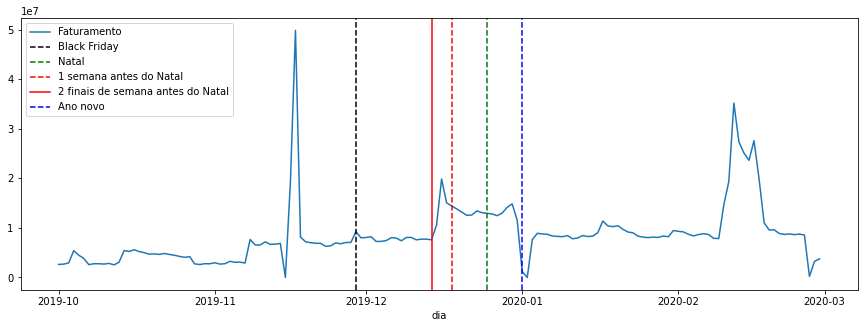

In [36]:
plt.figure(figsize=(15,5))
df.groupby('dia').faturamento.sum().plot(label='Faturamento')
plt.axvline(pd.to_datetime('2019-11-29'),color='k', linestyle='--', label='Black Friday')
plt.axvline(pd.to_datetime('2019-12-25'),color='g', linestyle='--', label='Natal')
plt.axvline(pd.to_datetime('2019-12-25') - pd.DateOffset(days=7),color='r', linestyle='--', label='1 semana antes do Natal')
plt.axvline(pd.to_datetime('2019-12-25') - pd.DateOffset(days=7+4),color='r', linestyle='-', label='2 finais de semana antes do Natal')
plt.axvline(pd.to_datetime('2020-01-01'),color='b', linestyle='--', label='Ano novo')

plt.legend()

# Ideia de MVP (Produto Mínimo Viável)
#### (ou <u>definição de público</u>)

##  para focar em um único tópico, será feita uma simplificação:

###  olhando somente os clientes de Smartphone

In [37]:
df2 = df.loc[(df.cat_1=='smartphone')]
display(df2)

,event_type,product_id,brand,price,user_id,user_session,target,cat_0,cat_1,cat_2,cat_3,timestamp,ts_hour,ts_minute,ts_weekday,ts_day,ts_month,ts_year,dia,faturamento
0,cart,1005014,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,0,electronics,smartphone,NA,NA,2019-11-01 00:00:14,0,0,4,1,11,2019,2019-11-01,0.00
1,cart,1005115,apple,949.47,565865924,fd4bd6d4-bd14-4fdc-9aff-bd41a594f82e,0,electronics,smartphone,NA,NA,2019-11-01 00:03:39,0,3,4,1,11,2019,2019-11-01,0.00
2,cart,1002542,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,0,electronics,smartphone,NA,NA,2019-11-01 00:05:54,0,5,4,1,11,2019,2019-11-01,0.00
3,cart,1002542,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,0,electronics,smartphone,NA,NA,2019-11-01 00:07:22,0,7,4,1,11,2019,2019-11-01,0.00
5,cart,1004873,samsung,362.29,563558500,e0729b6c-eafe-4b0f-9d66-6ee777d08488,0,electronics,smartphone,NA,NA,2019-11-01 00:13:40,0,13,4,1,11,2019,2019-11-01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11487187,purchase,1004788,xiaomi,115.81,581859066,37245ef0-2432-4de5-b1c0-4c38ac87fe4e,1,electronics,smartphone,NA,NA,2020-01-31 15:00:51,15,0,4,31,1,2020,2020-01-31,115.81
11487220,purchase,1004788,xiaomi,115.81,581859066,37245ef0-2432-4de5-b1c0-4c38ac87fe4e,1,electronics,smartphone,NA,NA,2020-01-31 15:02:01,15,2,4,31,1,2020,2020-01-31,115.81
11488270,purchase,1004395,sony,257.12,512936558,d8293e79-2a04-4479-8b21-8b51f416ad91,1,electronics,smartphone,NA,NA,2020-01-31 15:41:34,15,41,4,31,1,2020,2020-01-31,257.12
11491508,purchase,1003052,samsung,617.49,568888645,3a7e85af-119c-4e98-a059-544babb7eb5e,1,electronics,smartphone,NA,NA,2020-01-31 17:52:15,17,52,4,31,1,2020,2020-01-31,617.49


(array([1.06700e+04, 3.82915e+05, 3.54940e+05, 1.45278e+05, 8.66270e+04,
        7.13440e+04, 5.89920e+04, 2.07550e+04, 6.67270e+04, 4.03890e+04,
        6.41250e+04, 9.72240e+04, 1.99470e+04, 9.24400e+03, 4.56000e+03,
        3.20050e+04, 1.78080e+04, 5.99700e+03, 1.16880e+04, 1.94600e+04,
        5.46600e+03, 1.62000e+02, 1.08800e+03, 1.78600e+03, 5.35000e+02,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 3.09000e+02]),
 array([   0.        ,   85.41633333,  170.83266667,  256.249     ,
         341.66533333,  427.08166667,  512.498     ,  597.91433333,
         683.33066667,  768.747     ,  854.16333333,  939.57966667,
        1024.996     , 1110.41233333, 1195.82866667, 1281.245     ,
        1366.66133333, 1452.07766667, 1537.494     , 1622.91033333,
        1708.32666667, 1793.743     , 1879.15933333, 1964.57566667,
        2049.992     , 2135.40833333, 2220.82466667, 2306.241     ,
        2391.65733333, 2477.07366667, 2562.49      ]),
 <BarContainer object of 30 a

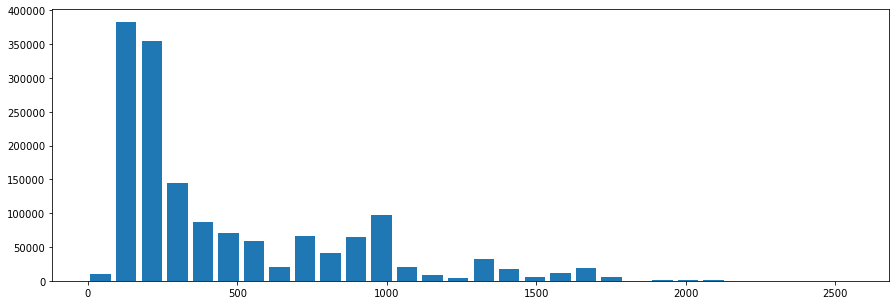

In [38]:
plt.figure(figsize=(15,5))
plt.hist(df2.price, bins=30, rwidth=.8)

(array([4.040e+02, 2.146e+03, 2.504e+03, 1.116e+03, 8.640e+02, 5.420e+02,
        4.410e+02, 3.180e+02, 6.430e+02, 5.370e+02, 2.720e+02, 9.230e+02,
        4.820e+02, 4.580e+02, 1.720e+02, 2.950e+02, 2.490e+02, 1.830e+02,
        3.000e+02, 2.700e+02, 9.400e+01, 1.000e+01, 5.400e+01, 6.300e+01,
        3.100e+01, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.        ,   85.41633333,  170.83266667,  256.249     ,
         341.66533333,  427.08166667,  512.498     ,  597.91433333,
         683.33066667,  768.747     ,  854.16333333,  939.57966667,
        1024.996     , 1110.41233333, 1195.82866667, 1281.245     ,
        1366.66133333, 1452.07766667, 1537.494     , 1622.91033333,
        1708.32666667, 1793.743     , 1879.15933333, 1964.57566667,
        2049.992     , 2135.40833333, 2220.82466667, 2306.241     ,
        2391.65733333, 2477.07366667, 2562.49      ]),
 <BarContainer object of 30 artists>)

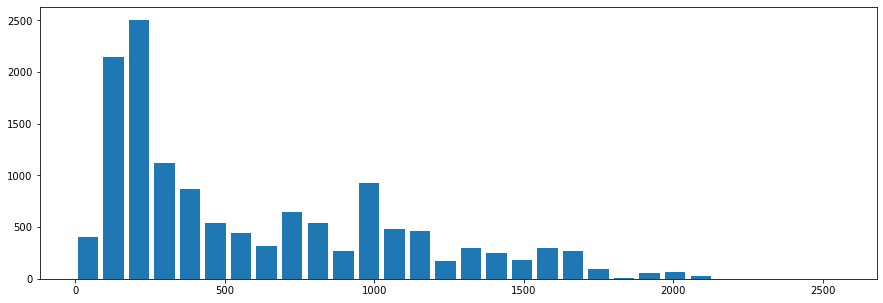

In [39]:
plt.figure(figsize=(15,5))
plt.hist(df2.price.unique(), bins=30, rwidth=.8)

### Existe uma diferença estatística nos preços de quem compra e de quem abandona o carrinho?

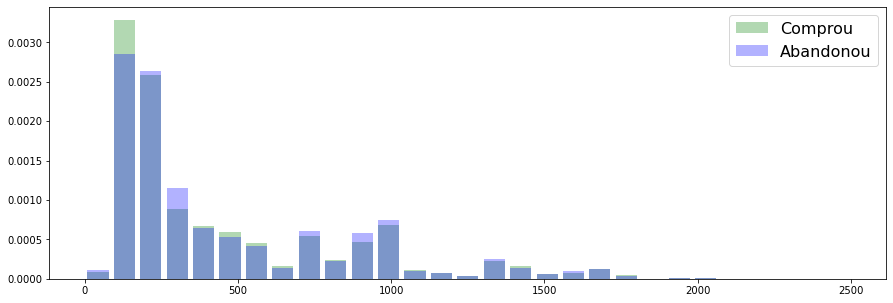

In [40]:
plt.figure(figsize=(15,5))
plt.hist(df2.loc[df2.target==1].price, bins=np.linspace(0,2500,30), rwidth=.8, density=True, color='g', alpha=.3, label='Comprou')
plt.hist(df2.loc[df2.target==0].price, bins=np.linspace(0,2500,30), rwidth=.8, density=True, color='b', alpha=.3, label='Abandonou')

plt.legend(fontsize=16)

### Para evitar misturar produtos de escopos muito diferentes, será limitado a celulares de até 1000 dólares

In [41]:
df2 = df.loc[(df.cat_1=='smartphone') & (df.price <= 1000)].copy()
df2.loc[:,'price'] = pd.to_numeric(df2.price)
display(df2)

,event_type,product_id,brand,price,user_id,user_session,target,cat_0,cat_1,cat_2,cat_3,timestamp,ts_hour,ts_minute,ts_weekday,ts_day,ts_month,ts_year,dia,faturamento
0,cart,1005014,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,0,electronics,smartphone,NA,NA,2019-11-01 00:00:14,0,0,4,1,11,2019,2019-11-01,0.00
1,cart,1005115,apple,949.47,565865924,fd4bd6d4-bd14-4fdc-9aff-bd41a594f82e,0,electronics,smartphone,NA,NA,2019-11-01 00:03:39,0,3,4,1,11,2019,2019-11-01,0.00
2,cart,1002542,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,0,electronics,smartphone,NA,NA,2019-11-01 00:05:54,0,5,4,1,11,2019,2019-11-01,0.00
3,cart,1002542,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,0,electronics,smartphone,NA,NA,2019-11-01 00:07:22,0,7,4,1,11,2019,2019-11-01,0.00
5,cart,1004873,samsung,362.29,563558500,e0729b6c-eafe-4b0f-9d66-6ee777d08488,0,electronics,smartphone,NA,NA,2019-11-01 00:13:40,0,13,4,1,11,2019,2019-11-01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11487187,purchase,1004788,xiaomi,115.81,581859066,37245ef0-2432-4de5-b1c0-4c38ac87fe4e,1,electronics,smartphone,NA,NA,2020-01-31 15:00:51,15,0,4,31,1,2020,2020-01-31,115.81
11487220,purchase,1004788,xiaomi,115.81,581859066,37245ef0-2432-4de5-b1c0-4c38ac87fe4e,1,electronics,smartphone,NA,NA,2020-01-31 15:02:01,15,2,4,31,1,2020,2020-01-31,115.81
11488270,purchase,1004395,sony,257.12,512936558,d8293e79-2a04-4479-8b21-8b51f416ad91,1,electronics,smartphone,NA,NA,2020-01-31 15:41:34,15,41,4,31,1,2020,2020-01-31,257.12
11491508,purchase,1003052,samsung,617.49,568888645,3a7e85af-119c-4e98-a059-544babb7eb5e,1,electronics,smartphone,NA,NA,2020-01-31 17:52:15,17,52,4,31,1,2020,2020-01-31,617.49


### Quais as marcas mais vendidas?

In [42]:
display(df2.brand.value_counts())

samsung     605565
apple       348971
xiaomi      231352
huawei       93263
oppo         56084
             ...  
ark              1
toto             1
leeco            1
kisswill         1
remax            1
Name: brand, Length: 62, dtype: int64

### preço por marca 

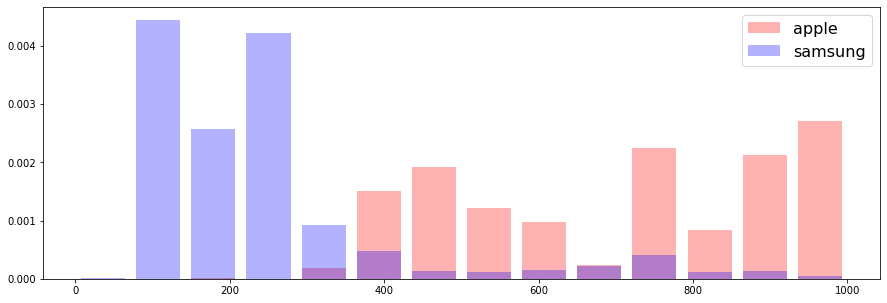

In [43]:
plt.figure(figsize=(15,5))
plt.hist(pd.to_numeric(df2.loc[df2.brand=='apple'].price),   bins=np.linspace(0,1000,15), rwidth=.8, color='r', density=True, alpha=.3, label='apple')
plt.hist(pd.to_numeric(df2.loc[df2.brand=='samsung'].price), bins=np.linspace(0,1000,15), rwidth=.8, color='b', density=True, alpha=.3, label='samsung')

plt.legend(fontsize=16)

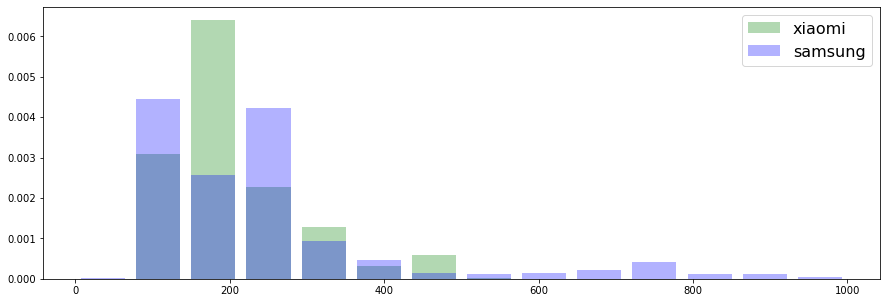

In [44]:
plt.figure(figsize=(15,5))
plt.hist(pd.to_numeric(df2.loc[df2.brand=='xiaomi'].price),  bins=np.linspace(0,1000,15), rwidth=.8, color='g', density=True, alpha=.3, label='xiaomi')
plt.hist(pd.to_numeric(df2.loc[df2.brand=='samsung'].price), bins=np.linspace(0,1000,15), rwidth=.8, color='b', density=True, alpha=.3, label='samsung')

plt.legend(fontsize=16)

In [45]:
df2.to_csv('base_smartphone.csv',index=False, header=True)

### Lembrando sobre essa tabela:

 - Contém somente os **smartphones** colocados no carrinho, vendidos ou não
 - E somente aqueles de valor **inferior à 1000 dólares**
   - A ideia é comparar produtos de <u>valor percebido</u> similar!

In [2]:
#abrir a tabela descrita acima
df = pd.read_csv('base_smartphone.csv') 


In [3]:
display(df)

,event_type,product_id,brand,price,user_id,user_session,target,cat_0,cat_1,cat_2,cat_3,timestamp,ts_hour,ts_minute,ts_weekday,ts_day,ts_month,ts_year,dia,faturamento
0,cart,1005014,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,0,electronics,smartphone,NaN,NaN,2019-11-01 00:00:14,0,0,4,1,11,2019,2019-11-01,0.00
1,cart,1005115,apple,949.47,565865924,fd4bd6d4-bd14-4fdc-9aff-bd41a594f82e,0,electronics,smartphone,NaN,NaN,2019-11-01 00:03:39,0,3,4,1,11,2019,2019-11-01,0.00
2,cart,1002542,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,0,electronics,smartphone,NaN,NaN,2019-11-01 00:05:54,0,5,4,1,11,2019,2019-11-01,0.00
3,cart,1002542,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,0,electronics,smartphone,NaN,NaN,2019-11-01 00:07:22,0,7,4,1,11,2019,2019-11-01,0.00
4,cart,1004873,samsung,362.29,563558500,e0729b6c-eafe-4b0f-9d66-6ee777d08488,0,electronics,smartphone,NaN,NaN,2019-11-01 00:13:40,0,13,4,1,11,2019,2019-11-01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370605,purchase,1004788,xiaomi,115.81,581859066,37245ef0-2432-4de5-b1c0-4c38ac87fe4e,1,electronics,smartphone,NaN,NaN,2020-01-31 15:00:51,15,0,4,31,1,2020,2020-01-31,115.81
1370606,purchase,1004788,xiaomi,115.81,581859066,37245ef0-2432-4de5-b1c0-4c38ac87fe4e,1,electronics,smartphone,NaN,NaN,2020-01-31 15:02:01,15,2,4,31,1,2020,2020-01-31,115.81
1370607,purchase,1004395,sony,257.12,512936558,d8293e79-2a04-4479-8b21-8b51f416ad91,1,electronics,smartphone,NaN,NaN,2020-01-31 15:41:34,15,41,4,31,1,2020,2020-01-31,257.12
1370608,purchase,1003052,samsung,617.49,568888645,3a7e85af-119c-4e98-a059-544babb7eb5e,1,electronics,smartphone,NaN,NaN,2020-01-31 17:52:15,17,52,4,31,1,2020,2020-01-31,617.49


## Conceito de elasticidade

#### Se eu aumentar o preço em 100 dolares. Em média, quantos clientes eu perco para cada uma dessas marcas?

> Primeiro, será listado somente aqueles clientes que <u>realmente comparam um smartphone no período</u>

In [4]:
quem_comprou = df.loc[df.target==1].user_id.drop_duplicates()
display(quem_comprou)

3675       513645631
3676       566281998
3677       516676963
3678       545304497
3679       565688911
             ...    
1369921    545879343
1369922    582444950
1369925    512936558
1369927    512749866
1370608    568888645
Name: user_id, Length: 249416, dtype: int64

In [5]:
display(df.loc[df.target==1].user_id.value_counts())

564068124    558
549030056    246
549109608    233
543312954    192
545376441    186
            ... 
558474842      1
516005469      1
564235871      1
524001088      1
512859980      1
Name: user_id, Length: 249416, dtype: int64

In [6]:
df.loc[df.target==0].user_id.value_counts()

521558076    310
586742246    234
564808105    210
515911561    206
538473314    175
            ... 
513225932      1
549309246      1
565737204      1
576004507      1
513804289      1
Name: user_id, Length: 330177, dtype: int64

### Agora será feito algumas definições....
> - **Faturamento**: Total de dinheiro ganho com vendas de smartphones
> - **Faturamento possível**: Total de dinheiro ganho de pessoas que **não** compraram smartphones, mas colocaram no carrinho

In [7]:
df_comprou = df.loc[df.user_id.isin(quem_comprou) & (df.target==1)].groupby('user_id').price.mean().rename('fat_comprou').reset_index()
display(df_comprou)

,user_id,fat_comprou
0,299358698,154.19
1,307138432,106.57
2,315835876,169.89
3,366237542,126.90
4,369234855,101.65
...,...,...
249411,619265218,179.90
249412,619311247,12.84
249413,619418098,182.48
249414,620119406,179.90


In [8]:
df_n_comprou = df.loc[~df.user_id.isin(quem_comprou)].groupby('user_id').price.mean().rename('fat_possivel').reset_index()
display(df_n_comprou)

,user_id,fat_possivel
0,94566147,93.78
1,128968633,231.34
2,227293446,281.34
3,239198635,187.24
4,248531147,259.92
...,...,...
230149,621495679,182.48
230150,621543863,182.48
230151,621582764,347.47
230152,621820912,128.68


### Conceito de elasticidade:

> <center><h3>Para cada faixa de preço, qual a chance de um cliente que colocou aquele produto no carrinho fechar a compra?</h3></center>

In [9]:
df_comprou.loc[:,'fx_preco'] = pd.cut(df_comprou.fat_comprou,np.arange(0,1001,250))
df_n_comprou.loc[:,'fx_preco'] = pd.cut(df_n_comprou.fat_possivel,np.arange(0,1001,250))

display(df_comprou)

,user_id,fat_comprou,fx_preco
0,299358698,154.19,"(0, 250]"
1,307138432,106.57,"(0, 250]"
2,315835876,169.89,"(0, 250]"
3,366237542,126.90,"(0, 250]"
4,369234855,101.65,"(0, 250]"
...,...,...,...
249411,619265218,179.90,"(0, 250]"
249412,619311247,12.84,"(0, 250]"
249413,619418098,182.48,"(0, 250]"
249414,620119406,179.90,"(0, 250]"


In [10]:
display(df_comprou.fx_preco.value_counts())

(0, 250]       134630
(250, 500]      61908
(750, 1000]     27217
(500, 750]      25661
Name: fx_preco, dtype: int64

In [11]:
display(df_comprou.groupby('fx_preco').fat_comprou.sum().to_frame())

,fat_comprou
fx_preco,
"(0, 250]",2.250266e+07
"(250, 500]",2.118718e+07
"(500, 750]",1.604603e+07
"(750, 1000]",2.425945e+07


In [12]:
aux = df_comprou.groupby('fx_preco').fat_comprou.sum().to_frame().join( df_n_comprou.groupby('fx_preco').fat_possivel.sum() )
display(aux)

,fat_comprou,fat_possivel
fx_preco,,
"(0, 250]",2.250266e+07,1.916051e+07
"(250, 500]",2.118718e+07,1.948904e+07
"(500, 750]",1.604603e+07,1.614954e+07
"(750, 1000]",2.425945e+07,3.033143e+07


In [13]:
aux.loc[:,'elastic'] = aux.fat_comprou / (aux.fat_comprou+aux.fat_possivel)
display(aux)

,fat_comprou,fat_possivel,elastic
fx_preco,,,
"(0, 250]",2.250266e+07,1.916051e+07,0.540109
"(250, 500]",2.118718e+07,1.948904e+07,0.520874
"(500, 750]",1.604603e+07,1.614954e+07,0.498392
"(750, 1000]",2.425945e+07,3.033143e+07,0.444387


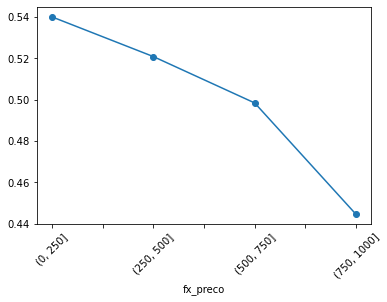

In [14]:
aux.elastic.plot(marker='o')
plt.xticks(rotation=45)
plt.show()

## Note que ela é decrescente!

> Isso significa que existe menos clientes dispostos a pagar um preço maior nesse produto
>
> Quanto mais rápido o decaimento, pode-se dizer que a empresa possui **clientes mais elásticos**, i.e., **que fazem uma busca mais exaustiva por preços bons**. Também são chamados de **clientes mais sensíveis ao preço**

In [15]:
X = pd.DataFrame(aux.reset_index().fx_preco.apply(lambda x: x.left)).astype(float)
y = aux.reset_index().elastic.astype(float)
print(X)

   fx_preco
0       0.0
1     250.0
2     500.0
3     750.0


### Usando uma regressão linear ou Ransac para estimar a elasticidade

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor


modelo_regressaolinear = LinearRegression(fit_intercept=True, normalize=False)
modelo_Ransac = RANSACRegressor()

modelo_regressaolinear.fit(X,y)
modelo_Ransac.fit(X,y)

from sklearn import metrics

previsao_regressaolinear = modelo_regressaolinear.predict(X)
previsao_Ransac = modelo_Ransac.predict(X)

# comparar os modelos
print(metrics.r2_score(y, previsao_regressaolinear))
print(metrics.r2_score(y, previsao_Ransac))

0.9333708705003579
0.9333708705003579


#### Note que as metricas do Ransac e da regressão linear foram iguais, isso se deve a ausencia de outliers e pela quantidade pequena de pontos que está sendo avaliado pelas ferramentas

In [17]:
#como ambas as métricas são iguais será utilizado a regressão linear 
intercepto = modelo_regressaolinear.intercept_
inclinacao = modelo_regressaolinear.coef_[0]

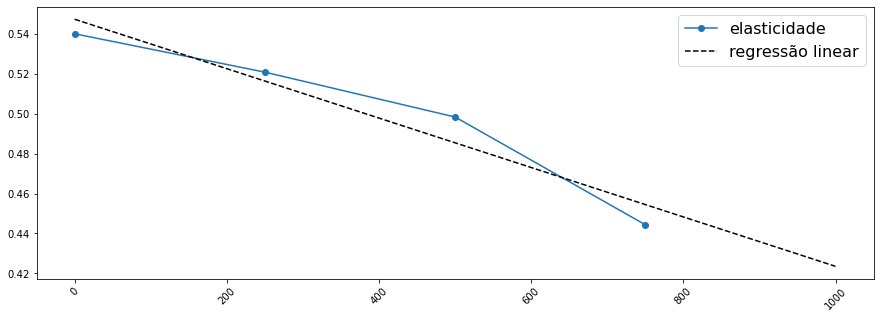

In [18]:
plt.figure(figsize=(15,5))
plt.plot( X.fx_preco, y, 'o-' , label = 'elasticidade')
plt.xticks(rotation=45)

xplot = np.linspace(0,1000,30)
yplot = xplot*inclinacao + intercepto

plt.plot(xplot,yplot,'k--', label = 'regressão linear')
plt.legend(fontsize=16)
plt.show()

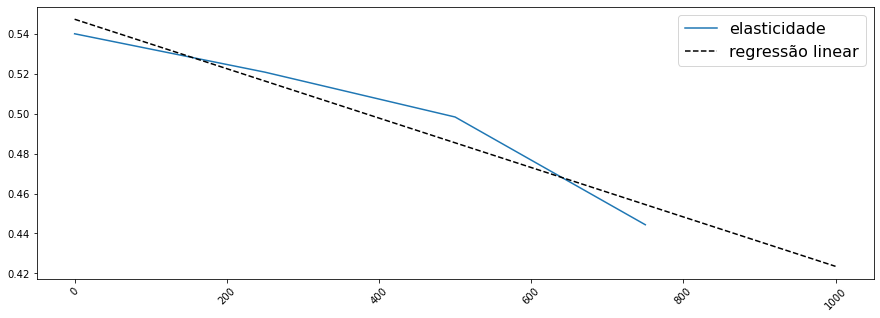

In [19]:
plt.figure(figsize=(15,5))
plt.plot( X.fx_preco, y , label='elasticidade')
plt.xticks(rotation=45)

xplot = np.linspace(0,1000,30)
yplot = modelo_regressaolinear.predict(xplot.reshape(-1, 1))

plt.plot(xplot,yplot,'k--',label='regressão linear')
plt.legend(fontsize=16)
plt.show()

In [20]:
print(intercepto, inclinacao)

0.5473879537589267 -0.00012385983849007176


In [21]:
# O primeiro 100 é pela porcentagem
# O segundo é para ficar em unidades de 100 dolares
print(intercepto, inclinacao*100 *100)

0.5473879537589267 -1.2385983849007176


### Interpretacao dos resultados:

>  - O **intercepto** só indica, grosso modo, o quanto são vendidos de celulares de menor custo. 
>
> O que estamos mais interessados é na **inclinação**!!
>
> - A **inclinação** indica, **para cada dólar de aumento no preço**, <u>quantos clientes que adicionaram o produto no carrinho deixam de fechar a compra</u>

#### Ou seja:

In [22]:
print(f'Para cada US$100,00, a empresa perde, em média {inclinacao*100*100:.2f}% dos clientes')

Para cada US$100,00, a empresa perde, em média -1.24% dos clientes


### Para simplificar análises futuras, irei resumir todo o código que fez esse cálculo em uma <u>função</u>

In [23]:
def gera_elasticidade(df, label=None, color=None):
    quem_comprou = df.loc[df.target==1].user_id.drop_duplicates()
    
    df_comprou = df.loc[df.user_id.isin(quem_comprou) & (df.target==1)].groupby('user_id').price.mean().rename('fat_comprou').reset_index()
    df_n_comprou = df.loc[~df.user_id.isin(quem_comprou)].groupby('user_id').price.mean().rename('fat_possivel').reset_index()
    
    df_comprou.loc[:,'fx_preco'] = pd.cut(df_comprou.fat_comprou,np.arange(0,1001,250))
    df_n_comprou.loc[:,'fx_preco'] = pd.cut(df_n_comprou.fat_possivel,np.arange(0,1001,250))
    aux = df_comprou.groupby('fx_preco').fat_comprou.agg(['sum','count']).add_prefix('fat_comprou_').join( df_n_comprou.groupby('fx_preco').fat_possivel.agg(['sum','count']).add_prefix('fat_possivel_') )
    aux.loc[:,'elastic'] = aux.fat_comprou_sum / (aux.fat_comprou_sum+aux.fat_possivel_sum)
    aux.loc[:,'n_samples'] = aux.fat_comprou_count + aux.fat_possivel_count
    
    aux = aux.dropna()    

    ######## 
    X = pd.DataFrame(aux.reset_index().fx_preco.apply(lambda x: (x.left+x.right)/2.)).astype(float)
    y = aux.reset_index().elastic.astype(float)
    
    modelo_regressaolinear = LinearRegression(fit_intercept=True, normalize=False)
    modelo_regressaolinear.fit(X,y, sample_weight=aux.n_samples)

    intercepto = modelo_regressaolinear.intercept_
    inclinacao = modelo_regressaolinear.coef_[0]
    
    if label is not None:
        print(f'{label:20s} {intercepto*100:.3f}% | {inclinacao*100*100:.3f}% / R$100,00')
    else:
        print(f'{intercepto:.3f} | {inclinacao*100:.3f}')
    
    plt.figure(figsize=(15,5))
    plt.plot( X.fx_preco, y, label='elasticidade', color=color, lw=5 )
    plt.xticks(rotation=45)

    xplot = np.linspace(0,1000,30)
    yplot = xplot*inclinacao + intercepto

    if color is None:
        color='k'
    plt.plot(xplot,yplot,'--', color=color,label='regressão linear')
    plt.legend(fontsize=16)
    plt.show()

In [24]:
display(df)

,event_type,product_id,brand,price,user_id,user_session,target,cat_0,cat_1,cat_2,cat_3,timestamp,ts_hour,ts_minute,ts_weekday,ts_day,ts_month,ts_year,dia,faturamento
0,cart,1005014,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,0,electronics,smartphone,NaN,NaN,2019-11-01 00:00:14,0,0,4,1,11,2019,2019-11-01,0.00
1,cart,1005115,apple,949.47,565865924,fd4bd6d4-bd14-4fdc-9aff-bd41a594f82e,0,electronics,smartphone,NaN,NaN,2019-11-01 00:03:39,0,3,4,1,11,2019,2019-11-01,0.00
2,cart,1002542,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,0,electronics,smartphone,NaN,NaN,2019-11-01 00:05:54,0,5,4,1,11,2019,2019-11-01,0.00
3,cart,1002542,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,0,electronics,smartphone,NaN,NaN,2019-11-01 00:07:22,0,7,4,1,11,2019,2019-11-01,0.00
4,cart,1004873,samsung,362.29,563558500,e0729b6c-eafe-4b0f-9d66-6ee777d08488,0,electronics,smartphone,NaN,NaN,2019-11-01 00:13:40,0,13,4,1,11,2019,2019-11-01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370605,purchase,1004788,xiaomi,115.81,581859066,37245ef0-2432-4de5-b1c0-4c38ac87fe4e,1,electronics,smartphone,NaN,NaN,2020-01-31 15:00:51,15,0,4,31,1,2020,2020-01-31,115.81
1370606,purchase,1004788,xiaomi,115.81,581859066,37245ef0-2432-4de5-b1c0-4c38ac87fe4e,1,electronics,smartphone,NaN,NaN,2020-01-31 15:02:01,15,2,4,31,1,2020,2020-01-31,115.81
1370607,purchase,1004395,sony,257.12,512936558,d8293e79-2a04-4479-8b21-8b51f416ad91,1,electronics,smartphone,NaN,NaN,2020-01-31 15:41:34,15,41,4,31,1,2020,2020-01-31,257.12
1370608,purchase,1003052,samsung,617.49,568888645,3a7e85af-119c-4e98-a059-544babb7eb5e,1,electronics,smartphone,NaN,NaN,2020-01-31 17:52:15,17,52,4,31,1,2020,2020-01-31,617.49


0.558 | -0.012


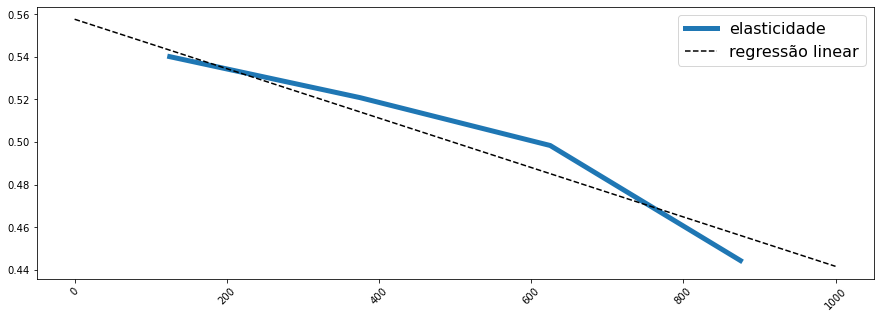

In [25]:
gera_elasticidade(df)

0.603 | -0.017


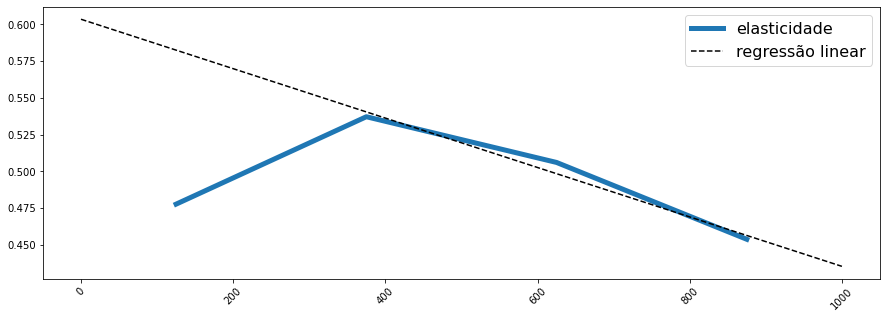

In [26]:
gera_elasticidade(df.loc[df.brand=='apple'])

### Para simplificar o uso em outros códigos, irei escrever essa função em um arquivo!

In [27]:
with open('elastic_tools.py', 'w') as f:
    f.write('''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
    
def gera_elasticidade(df, label=None, color=None):
    quem_comprou = df.loc[df.target==1].user_id.drop_duplicates()

    df_comprou = df.loc[df.user_id.isin(quem_comprou) & (df.target==1)].groupby('user_id').price.mean().rename('fat_comprou').reset_index()
    df_n_comprou = df.loc[~df.user_id.isin(quem_comprou)].groupby('user_id').price.mean().rename('fat_possivel').reset_index()
    
    df_comprou.loc[:,'fx_preco'] = pd.cut(df_comprou.fat_comprou,np.arange(0,1001,250))
    df_n_comprou.loc[:,'fx_preco'] = pd.cut(df_n_comprou.fat_possivel,np.arange(0,1001,250))
    aux = df_comprou.groupby('fx_preco').fat_comprou.agg(['sum','count']).add_prefix('fat_comprou_').join( df_n_comprou.groupby('fx_preco').fat_possivel.agg(['sum','count']).add_prefix('fat_possivel_') )
    aux.loc[:,'elastic'] = aux.fat_comprou_sum / (aux.fat_comprou_sum+aux.fat_possivel_sum)
    aux.loc[:,'n_samples'] = aux.fat_comprou_count + aux.fat_possivel_count
    
    aux = aux.dropna()    

    X = pd.DataFrame(aux.reset_index().fx_preco.apply(lambda x: (x.left+x.right)/2.)).astype(float)
    y = aux.reset_index().elastic.astype(float)
    
    modelo_regressaolinear = LinearRegression(fit_intercept=True, normalize=False)
    modelo_regressaolinear.fit(X,y, sample_weight=aux.n_samples)

    intercepto = modelo_regressaolinear.intercept_
    inclinacao = modelo_regressaolinear.coef_[0]
    
    if label is not None:
        print(f'{label:20s} {intercepto*100:.3f}% | {inclinacao*100*100:.3f}% / R$100,00')
    else:
        print(f'{intercepto:.3f} | {inclinacao*100:.3f}')
    
    plt.plot( X.fx_preco, y, label=label, color=color, lw=5 )
    plt.xticks(rotation=45)

    xplot = np.linspace(0,1000,30)
    yplot = xplot*inclinacao + intercepto

    if color is None:
        color='k'
    plt.plot(xplot,yplot,'--', color=color)
    ''')

0.558 | -0.012


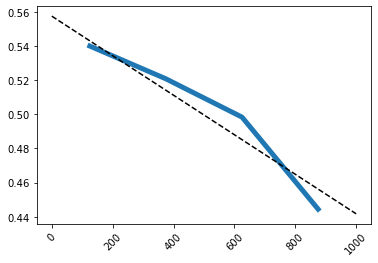

In [28]:
from elastic_tools import gera_elasticidade

gera_elasticidade(df)

## Agora será feito <u> uma comparação das elasticidades entre marcas</u>!!

apple                60.347% | -1.682% / R$100,00
samsung              57.088% | -1.203% / R$100,00
xiaomi               51.628% | -3.757% / R$100,00
huawei               56.948% | -2.407% / R$100,00


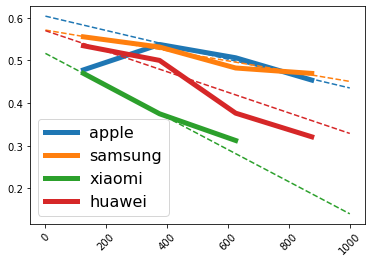

<Figure size 1080x360 with 0 Axes>

In [34]:
df_apple = df.loc[(df.brand=='apple')].copy()
df_samsung = df.loc[(df.brand=='samsung')].copy()
df_xiaomi = df.loc[(df.brand=='xiaomi')].copy()
df_huawei = df.loc[(df.brand=='huawei')].copy()


gera_elasticidade(df_apple,   label='apple',   color='C0')
gera_elasticidade(df_samsung, label='samsung', color='C1')
gera_elasticidade(df_xiaomi,  label='xiaomi',  color='C2')
gera_elasticidade(df_huawei,   label='huawei',   color='C3')


plt.legend(fontsize=16)
plt.figure(figsize=(15,5))
plt.savefig('elasticidades_smartphones.png', transparent=True, dpi=300)

# Interpretação dos resultados

> Clientes da **Samsung** são os **menos eláticos**, ou seja, nessa loja, quando eles entram pra comprar, eles compram!
> - Será que é uma característica dos clientes fidelizados dessa marca, que não se importam com o preço, **ou**
> - Será que os preços da nossa loja já estão entre os mais competitivos do mercado para essa marca?
>   - De qualquer forma, indica que fazer promoções nessa marca não deve gerar grandes resultados impactantes....

> Clientes da **Apple** são um **pouco mais elásticos**, mas nada muito chamativo
> - Note que, para essa marca, a função é crescente no começo
>   - Pode ser que esses clientes prefiram modelos um pouco mais caros (os muito baratos talvez sejam sempre modelos antigos e/ou usados?)
>   - Mas também pode ser um problema de **volume**: Lembre-se que tínhamos poucos celulares da Apple a um preço menor
>   - A reta ajustada parece não ter sido impactada por esse ponto: Provavelmente ele tem pouco volume!

> Clientes da **Xiaomi e huawei** são **os mais sensíveis ao preço**!
>  - Promoções nesses clientes deve gerar retornos maiores no faturamento!

## Estratégia

> Essas elasticidades são resultado de um **comportamento médio dos clientes**
> 
> - Será que não é possivel **separar os clientes em grupos de elasticidades distintas**?
>
> - Para isso será utilizado um <u>modelo de classificação</u> que indica a <u>propensão do cliente em comprar um smartphone</u>

### Passo 1 - Criação da tabela de modelagem

> Nessa base temos somente **clientes que colocaram um smartphone no carrinho, naquele mês**
>
#### Note que nem todos clientes aparecem todos os meses!
>
> Assim, é preciso construir uma tabela **visão cliente** ao invés de uma tabela **visão carrinho**

In [36]:
# Essa é a "chave" da tabela de modelagem
tabela_clientes = df[['user_id']].drop_duplicates().set_index(['user_id']).sort_index()
display(tabela_clientes)

""
user_id
94566147
128968633
227293446
239198635
248531147
...
621543863
621582764
621820912


### será preservado a temporalidade: 
>
> - será feito incialmente com uma tabela com as **características dos clientes no mês 10**
> - E com a **variável resposta** no mês 11
>
> Note que é preciso <u>defasar a variável resposta para termos um modelo <b>preditivo</b></u>

In [37]:
print(df.ts_month.unique())

[11 10  2 12  1]


In [38]:
df_mes_10 = df.loc[df.ts_month==10]

# Pra começar, será agrupado por cliente, o valor total que cada cliente colocou no carrinho, de cada marca
soma_cart_brand = df_mes_10.loc[df_mes_10.event_type=='cart'].pivot_table(
    index='user_id',
    columns='brand',
    values='price',
    aggfunc='sum'
)
display(soma_cart_brand)

brand,apple,asus,bq,doogee,fly,gionee,haier,honor,htc,huawei,...,oppo,prestigio,samsung,sony,texet,tp-link,umi,vivo,xiaomi,zte
user_id,,,,,,,,,,,,,,,,,,,,,
293957954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.77,NaN
304325717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
318611205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336595257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,488.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348815209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,285.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566263191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.46,NaN
566266119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,242.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
566272419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.70,NaN


### Algumas notas

> - `NaN` significa **Not a Number**: é uma forma do python representar **valores faltantes**
>   - No caso, o cliente que não apareceu como tendo gastos naquele mês, não comprou nada
>   - Assim, <u>faz sentido</u> preencher essas células com o valor `0`
>
> - Note também que os **nomes das colunas** ficaram os nomes das marcas
>   - Pra facilitar, será **colocado um prefixo** indicando o que significam essas colunas criadas

In [39]:
df_mes_10 = df.loc[df.ts_month==10]

# Pra começar, vamos agrupar, por cliente, o valor total que cada cliente colocou no carrinho, de cada marca
soma_cart_brand = df_mes_10.loc[df_mes_10.event_type=='cart'].pivot_table(
    index='user_id',
    columns='brand',
    values='price',
    aggfunc='sum'
).fillna(0).add_prefix('cart_price_sum_')
display(soma_cart_brand)

brand,cart_price_sum_apple,cart_price_sum_asus,cart_price_sum_bq,cart_price_sum_doogee,cart_price_sum_fly,cart_price_sum_gionee,cart_price_sum_haier,cart_price_sum_honor,cart_price_sum_htc,cart_price_sum_huawei,...,cart_price_sum_oppo,cart_price_sum_prestigio,cart_price_sum_samsung,cart_price_sum_sony,cart_price_sum_texet,cart_price_sum_tp-link,cart_price_sum_umi,cart_price_sum_vivo,cart_price_sum_xiaomi,cart_price_sum_zte
user_id,,,,,,,,,,,,,,,,,,,,,
293957954,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,191.77,0.0
304325717,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,376.80,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
318611205,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252.64,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0
336595257,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,488.30,0.0,0.0,0.0,0.0,0.0,0.00,0.0
348815209,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,285.40,0.0,0.0,0.0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566263191,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,94.46,0.0
566266119,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,242.63,0.0,0.0,0.0,0.0,0.0,0.00,0.0
566272419,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,94.70,0.0


##### <u> Proximo passo é juntar a tabela acima com as "chaves" criadas anteriormente

In [40]:
tabela_modelagem = tabela_clientes.join(soma_cart_brand).fillna(0)
display(tabela_modelagem)

,cart_price_sum_apple,cart_price_sum_asus,cart_price_sum_bq,cart_price_sum_doogee,cart_price_sum_fly,cart_price_sum_gionee,cart_price_sum_haier,cart_price_sum_honor,cart_price_sum_htc,cart_price_sum_huawei,...,cart_price_sum_oppo,cart_price_sum_prestigio,cart_price_sum_samsung,cart_price_sum_sony,cart_price_sum_texet,cart_price_sum_tp-link,cart_price_sum_umi,cart_price_sum_vivo,cart_price_sum_xiaomi,cart_price_sum_zte
user_id,,,,,,,,,,,,,,,,,,,,,
94566147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128968633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227293446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239198635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248531147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621543863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621582764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621820912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
tabela_clientes = df[['user_id']].drop_duplicates().set_index(['user_id']).sort_index()
df_mes_10 = df.loc[df.ts_month==10]

# Valor total de produtos no carrinho, por marca
soma_cart_brand = df_mes_10.loc[df_mes_10.event_type=='cart'].pivot_table(
    index='user_id',
    columns='brand',
    values='price',
    aggfunc='sum'
).add_prefix('cart_price_sum_').fillna(0)

# Quantidade total de produtos no carrinho, por marca
cnt_cart_brand = df_mes_10.loc[df_mes_10.event_type=='cart'].pivot_table(
    index='user_id',
    columns='brand',
    values='price',
    aggfunc='count'
).add_prefix('cart_price_count_').fillna(0)

# Valor total de produtos comprados, por marca
soma_purch_brand = df_mes_10.loc[df_mes_10.event_type=='purchase'].pivot_table(
    index='user_id',
    columns='brand',
    values='price',
    aggfunc='sum'
).add_prefix('purchase_price_sum_').fillna(0)

# Quantidade total de produtos comprados, por marca
cnt_purch_brand = df_mes_10.loc[df_mes_10.event_type=='purchase'].pivot_table(
    index='user_id',
    columns='brand',
    values='price',
    aggfunc='count'
).add_prefix('purchase_price_count_').fillna(0)



tabela_modelagem = tabela_clientes\
                    .join(soma_cart_brand)\
                    .join(cnt_cart_brand)\
                    .join(soma_purch_brand)\
                    .join(cnt_purch_brand)\
                    .fillna(0)
                    

display(tabela_modelagem)

,cart_price_sum_apple,cart_price_sum_asus,cart_price_sum_bq,cart_price_sum_doogee,cart_price_sum_fly,cart_price_sum_gionee,cart_price_sum_haier,cart_price_sum_honor,cart_price_sum_htc,cart_price_sum_huawei,...,purchase_price_count_oneplus,purchase_price_count_oppo,purchase_price_count_prestigio,purchase_price_count_samsung,purchase_price_count_sony,purchase_price_count_tp-link,purchase_price_count_umi,purchase_price_count_vivo,purchase_price_count_xiaomi,purchase_price_count_zte
user_id,,,,,,,,,,,,,,,,,,,,,
94566147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128968633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227293446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239198635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248531147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621543863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621582764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621820912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Mas e a variável resposta?

#### Preciso preservar a temporalidade! Ela deve vir do próximo mês!
>
> Note que na tabela original **um mesmo cliente pode aparecer mais de uma vez**
> - Simplesmente um produto ele comprou, e outro não
>
> Aqui foi tomada uma **decisão** para a **propensão de compras**
> - será realizada uma distinção entre **quem comprou qualquer coisa** de quem **não comprou nada**
> - Assim, preciso verificar que, **para cada cliente**, o **máximo da coluna `target`**

In [42]:
df_mes_11 = df.loc[df.ts_month==10+1]
target = df_mes_11.groupby('user_id').target.max()

display(target)

user_id
94566147     0
128968633    0
227293446    0
239198635    0
248531147    0
            ..
579962964    0
579963523    1
579966375    1
579967058    1
579967455    0
Name: target, Length: 322454, dtype: int64

##### Agregando essa informação na tabela de modelagem

In [44]:
tabela_modelagem_target = tabela_modelagem.join(target).fillna(0)
display(tabela_modelagem_target)

,cart_price_sum_apple,cart_price_sum_asus,cart_price_sum_bq,cart_price_sum_doogee,cart_price_sum_fly,cart_price_sum_gionee,cart_price_sum_haier,cart_price_sum_honor,cart_price_sum_htc,cart_price_sum_huawei,...,purchase_price_count_oppo,purchase_price_count_prestigio,purchase_price_count_samsung,purchase_price_count_sony,purchase_price_count_tp-link,purchase_price_count_umi,purchase_price_count_vivo,purchase_price_count_xiaomi,purchase_price_count_zte,target
user_id,,,,,,,,,,,,,,,,,,,,,
94566147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128968633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227293446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239198635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248531147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621543863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621582764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621820912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### E essa é tabela de modelagem!

> - Note que ela ficou com **mais de 100 colunas**!
> - Normalmente, podería fazer uma **análise preliminar** e entender como essas colunas se comportam
> - Mas fazer isso em <u>tantas colunas</u> será bem trabalhoso, e pode não levar a lugar nenhum
>
> - Assim será **utilizado um modelo para nos ajudar**!

In [45]:
tabela_modelagem_target.to_csv('tabela_modelagem_smartphones.csv', index=True, header=True) #salvando a tabela de modelagem

### Prosseguindo para o processo de <u>modelagem</u>!

#### Primeiro, devo ver como é o <u>balanceamento da variável resposta</u>

In [46]:
print(tabela_modelagem_target.target.mean())

0.3290906437016494


### Legal, os dados não são muito desbalanceados (o que exigiria alguns cuidados adicionais)

> Então posso prosseguir para nosso modelo!

#### Passo 1) Separação em variáveis preditivas e variável resposta

In [48]:
X = tabela_modelagem_target.drop('target',axis=1)
y = tabela_modelagem_target.target

In [49]:
print(X.shape, y.shape)

(479570, 106) (479570,)


#### Passo 2) Divisão em conjunto treino e conjunto teste (Out-Of-Sample)

In [50]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X.fillna(0),y, test_size=.3, random_state=71554)

In [51]:
display(X_tr)

,cart_price_sum_apple,cart_price_sum_asus,cart_price_sum_bq,cart_price_sum_doogee,cart_price_sum_fly,cart_price_sum_gionee,cart_price_sum_haier,cart_price_sum_honor,cart_price_sum_htc,cart_price_sum_huawei,...,purchase_price_count_oneplus,purchase_price_count_oppo,purchase_price_count_prestigio,purchase_price_count_samsung,purchase_price_count_sony,purchase_price_count_tp-link,purchase_price_count_umi,purchase_price_count_vivo,purchase_price_count_xiaomi,purchase_price_count_zte
user_id,,,,,,,,,,,,,,,,,,,,,
540749970,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523574428,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546609952,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562881908,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
545095667,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539583168,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
555842880,359.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524902047,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
display(X_ts)

,cart_price_sum_apple,cart_price_sum_asus,cart_price_sum_bq,cart_price_sum_doogee,cart_price_sum_fly,cart_price_sum_gionee,cart_price_sum_haier,cart_price_sum_honor,cart_price_sum_htc,cart_price_sum_huawei,...,purchase_price_count_oneplus,purchase_price_count_oppo,purchase_price_count_prestigio,purchase_price_count_samsung,purchase_price_count_sony,purchase_price_count_tp-link,purchase_price_count_umi,purchase_price_count_vivo,purchase_price_count_xiaomi,purchase_price_count_zte
user_id,,,,,,,,,,,,,,,,,,,,,
525560442,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560877770,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
512686628,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573820481,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
525546740,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558015832,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
531880720,460.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
575583292,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
print(X_tr.shape, y_tr.shape, X_ts.shape, y_ts.shape)

(335699, 106) (335699,) (143871, 106) (143871,)


#### Passo 3) Vamos fazer nosso <u>modelo benchmark</u>
>
> será utilizado um modelo de **árvore de decisão**
> - Ele não precisa de nenhuma preparação adicional dos dados que já temos (normalização, interação, etc...)
> - E ele, pela própria estrutura, já irá fazer a separação dos dados que desejamos!

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    'criterion':['gini','entropy'],
    'max_depth':[2,3,4],
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=71554,min_samples_leaf=1000),
    params,
    cv=10,
    scoring='roc_auc',
    verbose=10,
    n_jobs=1,
)

In [55]:
display(grid.fit(X_tr,y_tr))

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10; 1/6] START criterion=gini, max_depth=2................................
[CV 1/10; 1/6] END ..............criterion=gini, max_depth=2; total time=   0.6s
[CV 2/10; 1/6] START criterion=gini, max_depth=2................................
[CV 2/10; 1/6] END ..............criterion=gini, max_depth=2; total time=   0.5s
[CV 3/10; 1/6] START criterion=gini, max_depth=2................................
[CV 3/10; 1/6] END ..............criterion=gini, max_depth=2; total time=   0.5s
[CV 4/10; 1/6] START criterion=gini, max_depth=2................................
[CV 4/10; 1/6] END ..............criterion=gini, max_depth=2; total time=   0.5s
[CV 5/10; 1/6] START criterion=gini, max_depth=2................................
[CV 5/10; 1/6] END ..............criterion=gini, max_depth=2; total time=   0.5s
[CV 6/10; 1/6] START criterion=gini, max_depth=2................................
[CV 6/10; 1/6] END ..............criterion=gini,

[CV 1/10; 6/6] END ...........criterion=entropy, max_depth=4; total time=   0.8s
[CV 2/10; 6/6] START criterion=entropy, max_depth=4.............................
[CV 2/10; 6/6] END ...........criterion=entropy, max_depth=4; total time=   0.8s
[CV 3/10; 6/6] START criterion=entropy, max_depth=4.............................
[CV 3/10; 6/6] END ...........criterion=entropy, max_depth=4; total time=   0.9s
[CV 4/10; 6/6] START criterion=entropy, max_depth=4.............................
[CV 4/10; 6/6] END ...........criterion=entropy, max_depth=4; total time=   0.9s
[CV 5/10; 6/6] START criterion=entropy, max_depth=4.............................
[CV 5/10; 6/6] END ...........criterion=entropy, max_depth=4; total time=   0.9s
[CV 6/10; 6/6] START criterion=entropy, max_depth=4.............................
[CV 6/10; 6/6] END ...........criterion=entropy, max_depth=4; total time=   0.9s
[CV 7/10; 6/6] START criterion=entropy, max_depth=4.............................
[CV 7/10; 6/6] END .........

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=1000,
                                              random_state=71554),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4]},
             scoring='roc_auc', verbose=10)

In [56]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 4}


#### Como utilizar esse modelo

In [58]:
print(grid.predict_proba(X_ts))

[[0.59394077 0.40605923]
 [0.85472516 0.14527484]
 [0.59394077 0.40605923]
 ...
 [0.59394077 0.40605923]
 [0.59394077 0.40605923]
 [0.59394077 0.40605923]]


In [59]:
print(grid.predict_proba(X_ts)[:,1])

[0.40605923 0.14527484 0.40605923 ... 0.40605923 0.40605923 0.40605923]


In [61]:
X_pred = X_ts.copy()
X_pred.loc[:,'predicao'] = grid.predict_proba(X_ts)[:,1]
display(X_pred)

,cart_price_sum_apple,cart_price_sum_asus,cart_price_sum_bq,cart_price_sum_doogee,cart_price_sum_fly,cart_price_sum_gionee,cart_price_sum_haier,cart_price_sum_honor,cart_price_sum_htc,cart_price_sum_huawei,...,purchase_price_count_oppo,purchase_price_count_prestigio,purchase_price_count_samsung,purchase_price_count_sony,purchase_price_count_tp-link,purchase_price_count_umi,purchase_price_count_vivo,purchase_price_count_xiaomi,purchase_price_count_zte,predicao
user_id,,,,,,,,,,,,,,,,,,,,,
525560442,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406059
560877770,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145275
512686628,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406059
573820481,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406059
525546740,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558015832,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406059
531880720,460.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084417
575583292,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.406059


### Avalindo esse modelo 

In [63]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score( y_ts,grid.predict_proba(X_ts)[:,1] ))

0.6335471548682796


# O que isso significa?

 - **ROC/AUC** é uma métrica que indica "O quão bem nossos scores <u>ordenam</u> nossos dados
   - Se indívíduos com score elevado têm mais chance de ter variável resposta igual à 1, ROC/AUC é próxima de 1.00
   - Se a chance da variável resposta ser 1 ou 0 não depende em nada do score, então a ROC/AUC é próxima de 0.50
   
Aqui no caso o modelo que é **um pouco melhor do que o aleatório**.

 - Tipicamente ROC/AUC entre 0.60 e 0.70 indicam um modelo **Ok**. Não é um super modelo, mas dá pra usar.

# Mas aqui <u>não tenho interesse em ter um super modelo</u>!

 - O que quero é um modelo que separe os dados em <u>grupos que façam sentido</u>
 - E o método que escolhi faz isso naturalmente!

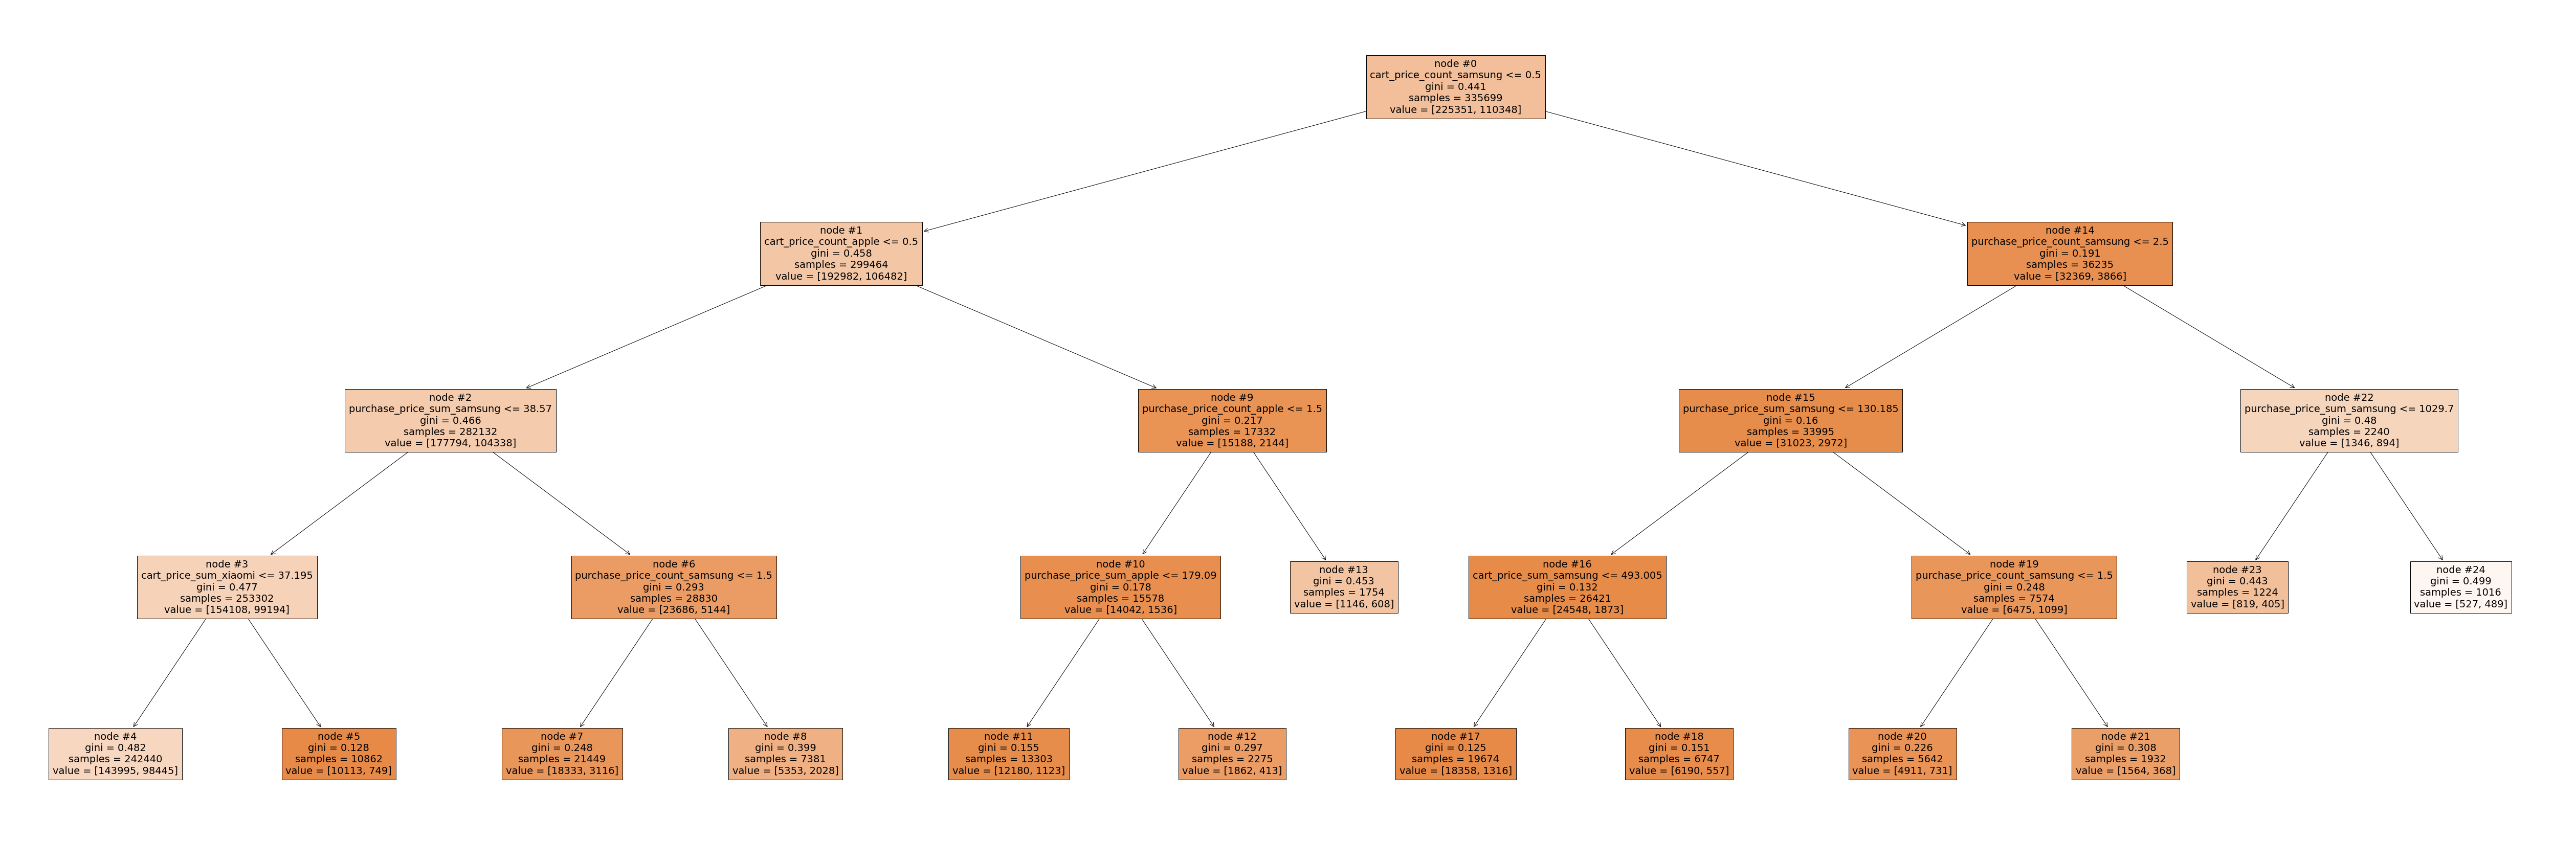

In [66]:
from sklearn.tree import plot_tree

plt.figure(figsize=(90,30))
plot_tree(
    grid.best_estimator_,
    feature_names=X_tr.columns,
    filled=True,
    node_ids=True,
);
plt.show()

### Agora, pra checar se essa separação funciona, irei construir um <u>conjunto de validação</u> (out-of-time)!

In [67]:
X_val = df[['user_id']].drop_duplicates().set_index(['user_id']).sort_index()
df_mes_11 = df.loc[df.ts_month==11]

soma_cart_brand = df_mes_11.loc[df_mes_11.event_type=='cart'].pivot_table(
    index='user_id',
    columns='brand',
    values='price',
    aggfunc='sum'
).add_prefix('cart_price_sum_').fillna(0)

cnt_cart_brand = df_mes_11.loc[df_mes_11.event_type=='cart'].pivot_table(
    index='user_id',
    columns='brand',
    values='price',
    aggfunc='count'
).add_prefix('cart_price_count_').fillna(0)

soma_purch_brand = df_mes_11.loc[df_mes_11.event_type=='purchase'].pivot_table(
    index='user_id',
    columns='brand',
    values='price',
    aggfunc='sum'
).add_prefix('purchase_price_sum_').fillna(0)

cnt_purch_brand = df_mes_11.loc[df_mes_11.event_type=='purchase'].pivot_table(
    index='user_id',
    columns='brand',
    values='price',
    aggfunc='count'
).add_prefix('purchase_price_count_').fillna(0)


soma_cart_cat_0 = df_mes_11.loc[df_mes_11.event_type=='cart'].pivot_table(
    index='user_id',
    columns='cat_0',
    values='price',
    aggfunc='sum'
).add_prefix('cat_0_cart_price_sum_').fillna(0)

cnt_cart_cat_0 = df_mes_11.loc[df_mes_11.event_type=='cart'].pivot_table(
    index='user_id',
    columns='cat_0',
    values='price',
    aggfunc='count'
).add_prefix('cat_0_cart_price_count_').fillna(0)

soma_purch_cat_0 = df_mes_11.loc[df_mes_11.event_type=='purchase'].pivot_table(
    index='user_id',
    columns='cat_0',
    values='price',
    aggfunc='sum'
).add_prefix('cat_0_purchase_price_sum_').fillna(0)

cnt_purch_cat_0 = df_mes_11.loc[df_mes_11.event_type=='purchase'].pivot_table(
    index='user_id',
    columns='cat_0',
    values='price',
    aggfunc='count'
).add_prefix('cat_0_purchase_price_count_').fillna(0)


df_mes_12 = df.loc[df.ts_month==12]
target_12 = df_mes_12.groupby('user_id').target.max()

X_val = X_val.join(soma_cart_brand).join(cnt_cart_brand).join(soma_purch_brand).join(cnt_purch_brand)\
.join(soma_cart_cat_0).join(cnt_cart_cat_0).join(soma_purch_cat_0).join(cnt_purch_cat_0).join(target_12)

display(X_val)

,cart_price_sum_apple,cart_price_sum_asus,cart_price_sum_blackberry,cart_price_sum_bq,cart_price_sum_doogee,cart_price_sum_fly,cart_price_sum_gionee,cart_price_sum_google,cart_price_sum_haier,cart_price_sum_honor,...,purchase_price_count_tp-link,purchase_price_count_umi,purchase_price_count_vivo,purchase_price_count_xiaomi,purchase_price_count_zte,cat_0_cart_price_sum_electronics,cat_0_cart_price_count_electronics,cat_0_purchase_price_sum_electronics,cat_0_purchase_price_count_electronics,target
user_id,,,,,,,,,,,,,,,,,,,,,
94566147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,93.78,1.0,NaN,NaN,NaN
128968633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,231.34,1.0,NaN,NaN,NaN
227293446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,281.34,1.0,NaN,NaN,NaN
239198635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,374.48,2.0,NaN,NaN,NaN
248531147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,259.92,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621543863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621582764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621820912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Mas e se alguma coluna que apareceu no treino (mês 10) não aparecer aqui??

 - Por exemplo, porque alguma marca não teve vendas nesse mês?
 
Nesse caso **irei forçar essa coluna a existir**, mas preenchendo-a com **valores faltantes**

 - Note que, nesse caso, trato o valor faltante como **não vendas (ou seja, 0)**.
 - Em outros casos pode ser preciso tomar decisões diferentes!

In [68]:
for col in X_tr.columns:
    if col not in X_val.columns:
        X_val.loc[:,col] = np.nan

### E agora, posso <u>aplicar</u> as regras da árvore de decisão nesse conjunto!

 - Note que estou verificando o poder de **Generalização para o futuro** do modelo!

In [69]:
X_val.loc[:,'node_ids'] = grid.best_estimator_.apply(X_val[X_tr.columns].fillna(0))
display(X_val)

,cart_price_sum_apple,cart_price_sum_asus,cart_price_sum_blackberry,cart_price_sum_bq,cart_price_sum_doogee,cart_price_sum_fly,cart_price_sum_gionee,cart_price_sum_google,cart_price_sum_haier,cart_price_sum_honor,...,purchase_price_count_umi,purchase_price_count_vivo,purchase_price_count_xiaomi,purchase_price_count_zte,cat_0_cart_price_sum_electronics,cat_0_cart_price_count_electronics,cat_0_purchase_price_sum_electronics,cat_0_purchase_price_count_electronics,target,node_ids
user_id,,,,,,,,,,,,,,,,,,,,,
94566147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,93.78,1.0,NaN,NaN,NaN,5
128968633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,231.34,1.0,NaN,NaN,NaN,17
227293446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,281.34,1.0,NaN,NaN,NaN,5
239198635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,374.48,2.0,NaN,NaN,NaN,5
248531147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,259.92,1.0,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621543863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
621582764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
621820912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [70]:
print(X_val.node_ids.value_counts(normalize=True))

4     0.476354
17    0.107344
11    0.095944
5     0.083781
7     0.079467
18    0.055356
20    0.025504
8     0.025133
12    0.016321
13    0.011640
21    0.010468
23    0.006744
24    0.005945
Name: node_ids, dtype: float64


In [71]:
print(X_val.groupby('node_ids').target.mean().sort_values())

node_ids
5     0.415020
4     0.473713
18    0.507463
17    0.540856
11    0.571875
20    0.580000
7     0.744589
23    0.750000
12    0.760000
8     0.770588
21    0.776471
24    0.798387
13    0.813559
Name: target, dtype: float64


### Verificando como são as elasticidades desses grupos de clientes??

In [72]:
df_val = df.set_index('user_id').join( X_val[['node_ids']] ).reset_index()
display(df_val)

,user_id,event_type,product_id,brand,price,user_session,target,cat_0,cat_1,cat_2,...,timestamp,ts_hour,ts_minute,ts_weekday,ts_day,ts_month,ts_year,dia,faturamento,node_ids
0,94566147,cart,1005007,xiaomi,93.78,3c4da186-6885-4170-9346-a2c835c44694,0,electronics,smartphone,NaN,...,2019-11-12 08:04:08,8,4,1,12,11,2019,2019-11-12,0.00,5
1,128968633,cart,1004888,samsung,231.34,02cb7aa7-712e-49e9-aa86-e4368d1467ac,0,electronics,smartphone,NaN,...,2019-11-22 13:53:01,13,53,4,22,11,2019,2019-11-22,0.00,17
2,227293446,cart,1005253,xiaomi,281.34,c85fa086-8196-4152-89a8-f3f6c1d53c5f,0,electronics,smartphone,NaN,...,2019-11-27 14:38:06,14,38,2,27,11,2019,2019-11-27,0.00,5
3,239198635,cart,1003942,xiaomi,187.24,23014d2e-0647-4c12-af4b-aa13f738bbd3,0,electronics,smartphone,NaN,...,2019-11-09 08:29:59,8,29,5,9,11,2019,2019-11-09,0.00,5
4,239198635,cart,1003942,xiaomi,187.24,23014d2e-0647-4c12-af4b-aa13f738bbd3,0,electronics,smartphone,NaN,...,2019-11-09 08:30:54,8,30,5,9,11,2019,2019-11-09,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370605,621543863,cart,1004740,xiaomi,182.48,ea6226a4-78ef-4a26-99b2-f33ba508a780,0,electronics,smartphone,NaN,...,2020-02-28 16:16:02,16,16,4,28,2,2020,2020-02-28,0.00,4
1370606,621582764,cart,1004797,xiaomi,347.47,23eb71d9-29cb-40ee-b926-8bf59eff2613,0,electronics,smartphone,NaN,...,2020-02-28 18:00:46,18,0,4,28,2,2020,2020-02-28,0.00,4
1370607,621820912,cart,1003726,sony,128.68,26e81234-5323-450e-8542-1e64e575c541,0,electronics,smartphone,NaN,...,2020-02-29 10:05:37,10,5,5,29,2,2020,2020-02-29,0.00,4
1370608,621931689,cart,1004740,xiaomi,182.48,6767e67e-e586-479b-a094-8f2644d2da24,0,electronics,smartphone,NaN,...,2020-02-29 14:54:41,14,54,5,29,2,2020,2020-02-29,0.00,4


In [73]:
print(X_val.groupby('node_ids').target.mean().sort_values())

node_ids
5     0.415020
4     0.473713
18    0.507463
17    0.540856
11    0.571875
20    0.580000
7     0.744589
23    0.750000
12    0.760000
8     0.770588
21    0.776471
24    0.798387
13    0.813559
Name: target, dtype: float64


4  : 0.47            56.253% | 1.283% / R$100,00
11 : 0.57            45.416% | -5.310% / R$100,00
13 : 0.81            100.000% | 0.000% / R$100,00


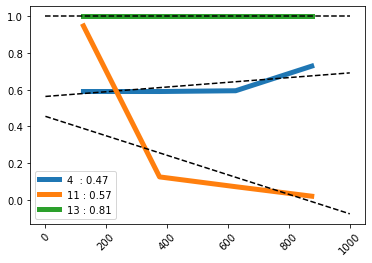

In [74]:
from elastic_tools import gera_elasticidade

propensao = X_val.groupby('node_ids').target.mean().sort_values()
    
gera_elasticidade(df_val.loc[ df_val.node_ids==4  ].reset_index() , label=f'4  : {propensao[4 ]:.2f}')
gera_elasticidade(df_val.loc[ df_val.node_ids==11 ].reset_index() , label=f'11 : {propensao[11]:.2f}')
gera_elasticidade(df_val.loc[ df_val.node_ids==13 ].reset_index() , label=f'13 : {propensao[13]:.2f}')

plt.legend()
plt.show()

# Interpretação

 - Os muito propensos sempre compram! São **pouco elasticos**
 - Os médio propensos <u>querem</u> comprar, mas não se decidiram. São **mais elásticos**
 - Os pouco propensos compram ocasionalmente, talvez sujeitos a oportunidades. São **pouco elásticos** (porém talvez propensos a anúncios!

#### Observe que essa é a interpretação <u>dessas folhas!</u>

 - Outras folhas podem ter outras interpretações!

17 : 0.54            4.845% | 4.603% / R$100,00
18 : 0.51            13.572% | -0.415% / R$100,00
5 : 0.42             24.836% | 0.195% / R$100,00


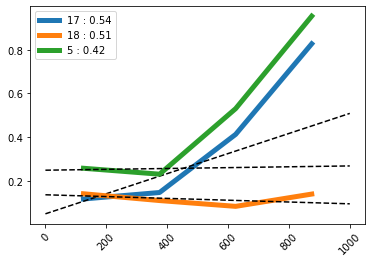

In [80]:
propensao = X_val.groupby('node_ids').target.mean().sort_values()

gera_elasticidade(df_val.loc[ df_val.node_ids==17 ].reset_index() , label=f'17 : {propensao[17]:.2f}')
gera_elasticidade(df_val.loc[ df_val.node_ids==18 ].reset_index() , label=f'18 : {propensao[18]:.2f}')
gera_elasticidade(df_val.loc[ df_val.node_ids==5 ].reset_index() , label=f'5 : {propensao[5]:.2f}')

plt.legend()
plt.show()

### E será que isso se reflete em marcas?

apple                10.475% | -0.972% / R$100,00
samsung              83.568% | -0.512% / R$100,00
xiaomi               50.324% | -3.489% / R$100,00
huawei               53.348% | -2.665% / R$100,00


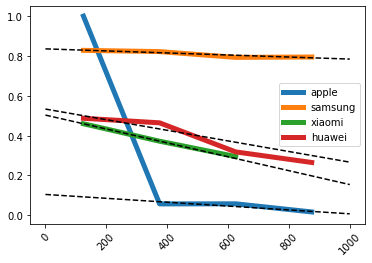

In [81]:
   
gera_elasticidade(df_val.loc[ (df_val.node_ids==11) & (df_val.brand=='apple'  ) ].reset_index() , label=f'apple'  )
gera_elasticidade(df_val.loc[ (df_val.node_ids==11) & (df_val.brand=='samsung') ].reset_index() , label=f'samsung')
gera_elasticidade(df_val.loc[ (df_val.node_ids==11) & (df_val.brand=='xiaomi' ) ].reset_index() , label=f'xiaomi' )
gera_elasticidade(df_val.loc[ (df_val.node_ids==11) & (df_val.brand=='huawei' ) ].reset_index() , label=f'huawei' )

plt.legend()
plt.show()

### Nesse grupo de elasticidade

 - Clientes da Apple são **totalmente inelásticos**! Eles até preferem modelos mais caros!
 - Clientes da Samsung são **pouco elásticos**, mas apresentam uma tendência sensibilidade ao preço...
 - Clientes da Xiaomi são **elásticos**, porém com um comportamento <u>não linear</u> no preço!
 - Clientes da Huawei são **elásticos**!

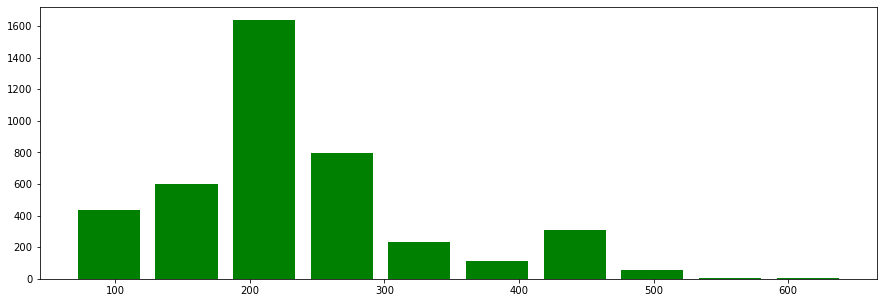

In [83]:
plt.figure(figsize=(15,5))
plt.hist( 
    df_val.loc[ (df_val.node_ids==11) & (df_val.brand=='xiaomi' ) ].price,
    bins=10,
    rwidth=.8,
    color='g'
)
plt.show()

### Obeserve que para a Xiaomi <u>não há volume</u> em celular acima de 500 e poucos dólares!

 - Isso explica o efeito não-linear: É ruído!